In [1]:
import warnings
warnings.filterwarnings('ignore')
import os
os.environ['PROJ_LIB'] = r'C:/Users/mastr/miniconda3/pkgs/proj4-5.2.0-ha925a31_1/Library/share'
import glob
import numpy as np
import pandas as pd
#from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import matplotlib.gridspec as gridspec


In [2]:
## Function for creating a path, if needed ##
def checkDir(out_path):
    if not os.path.exists(out_path):
        os.makedirs(out_path)

def gwpstar(arr,coeff1,coeff2,gwp100):
    arr_init = coeff1*arr[0:19]*gwp100
    gwparr = np.copy(arr)
    gwparr[20:gwparr.shape[0]] = coeff1*(arr[20:arr.shape[0]]*gwp100)-coeff2*(arr[0:gwparr.shape[0]-20]*gwp100)
    gwparr[0:19] = arr_init
    return(gwparr)

#### ======== Set the paths ========####

# Path for netcdf files
data_path = 'C:/Users/mastr/Documents/LSCE/ACC2_simulations'                         ## WINDOWS
#data_path = '/Users/mmastro/Documents/LSCE/Carbon Budget'               ## MAC OS

# Path for the output files (images, etc)
out_path = "C:/Users/mastr/Documents/LSCE/RESULTS/Carbon_Budget_BETA&Q10_COU"
#out_path = '/Users/mmastro/Documents/LSCE/RESULTS'


## Constants
MttoGt = 0.001
CtoCO2 = 44/12
NtoN2O = 44/14
CO2toC = 12/44

## Standard Simulations with both CO2 and CH4 ANT Emissions

Open Data

In [3]:
path = "/CarbonBudget_IPSL_allGHG/"
all_files = glob.glob(os.path.join(data_path + path + "out_future_IPSL_allghg_1.5*.csv"))

dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)

df_all_15 = pd.concat(dfs, ignore_index=True)

path = "/CarbonBudget_IPSL_allGHG/"
all_files = glob.glob(os.path.join(data_path + path + "out_future_IPSL_allghg_2*.csv"))

dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)

df_all_20 = pd.concat(dfs, ignore_index=True)

# Convert TARGET and DR columns to integers
df_all_15.TARGET = df_all_15.TARGET.astype(int)
df_all_15.DR = df_all_15.DR.astype(int)

df_all_20.TARGET = df_all_20.TARGET.astype(int)
df_all_20.DR = df_all_20.DR.astype(int)

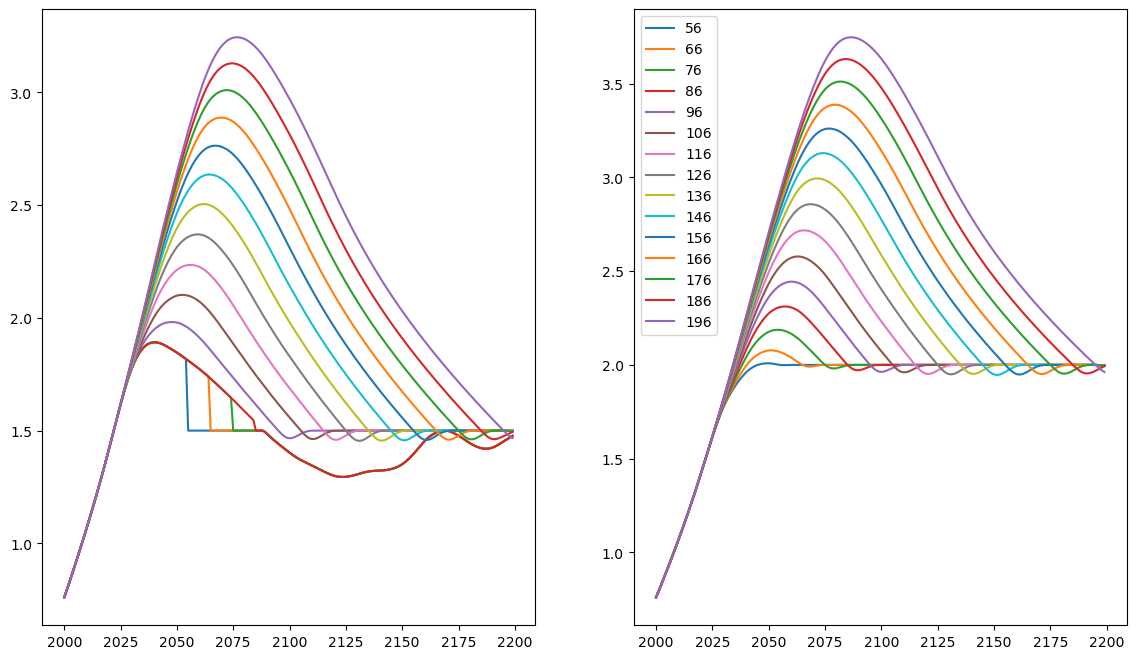

In [4]:
targets = sorted(map(int, (df_all_15["TARGET"].unique())))
targets_yrs = [element + 2000 for element in targets]

dr = 7

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)

ax = fig.add_subplot(gs[0, 0])
for scn in list(targets):
    data = df_all_15[df_all_15["TARGET"] == scn]
    year = data[data['DR'] == dr]["YEAR"]
    em = data[data['DR'] == dr]["T2M"]
    ax.plot(year[0:200],em[0:200])

ax = fig.add_subplot(gs[0, 1])
for scn in list(targets):
    data = df_all_20[df_all_20["TARGET"] == scn]
    year = data[data['DR'] == dr]["YEAR"]
    em = data[data['DR'] == dr]["T2M"]
    ax.plot(year[0:200],em[0:200])

    ax.legend(targets)

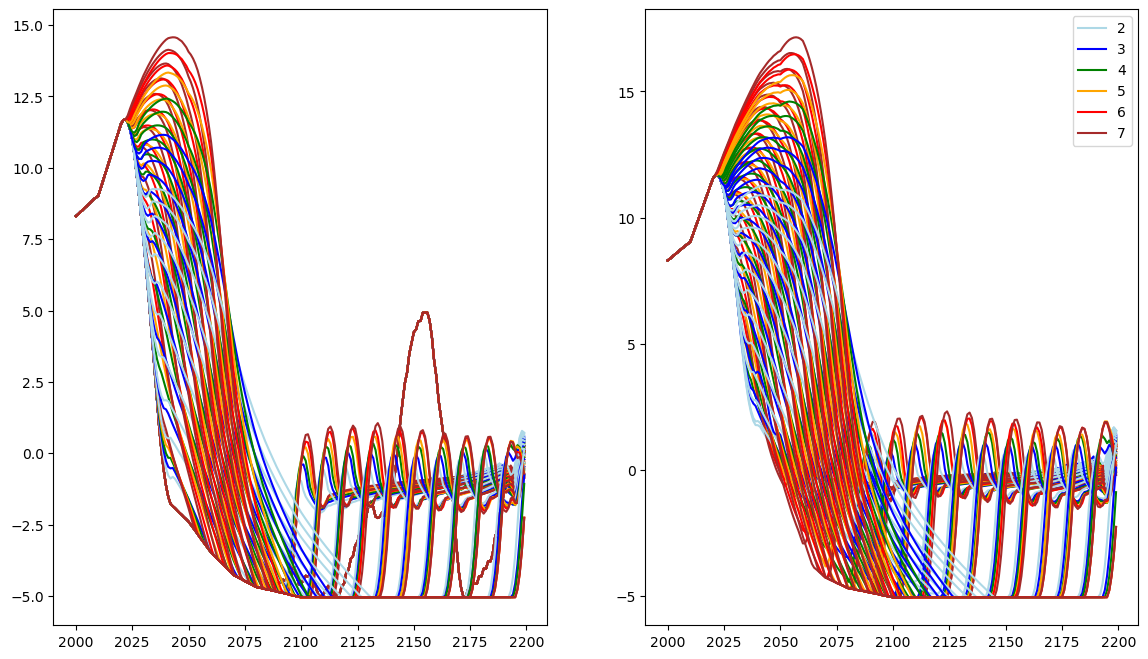

In [5]:
targets = sorted(map(int, (df_all_15["TARGET"].unique())))
drates = sorted(map(int, (df_all_15["DR"].unique())))

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)

colors = ['lightblue','blue','green','orange','red','brown']
ax = fig.add_subplot(gs[0, 0])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_all_15[df_all_15["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["ANTCO2"]#.cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

ax = fig.add_subplot(gs[0, 1])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_all_20[df_all_20["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["ANTCO2"]#.cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

    ax.legend(drates)

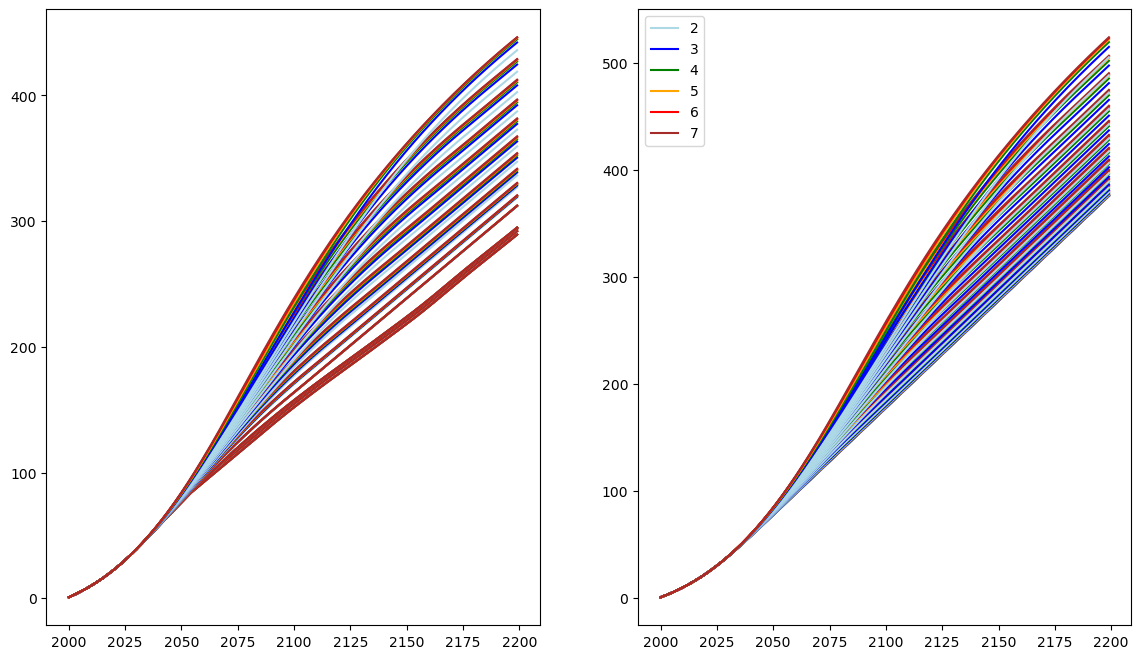

In [6]:
# Temperature 

targets = sorted(map(int, (df_all_15["TARGET"].unique())))
drates = sorted(map(int, (df_all_15["DR"].unique())))

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)

colors = ['lightblue','blue','green','orange','red','brown']
ax = fig.add_subplot(gs[0, 0])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_all_15[df_all_15["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["T2M"].cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

ax = fig.add_subplot(gs[0, 1])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_all_20[df_all_20["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["T2M"].cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

    ax.legend(drates)

### Disentangle OS Magnitude effect

In [7]:
# Define sets of targets and discount rates values

targets = sorted(df_all_15["TARGET"].unique()); targets
drates = sorted(df_all_15["DR"].unique()); drates


[2, 3, 4, 5, 6, 7]

Carbon and Temperature OS

In [8]:
df_OS_allghg_2 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'GHG_OS', 'CO2_OS', 'CH4_OS'])
df_OS_allghg_2.TARGET = targets
df_OS_allghg_2=df_OS_allghg_2.reindex(df_OS_allghg_2.index.repeat(len(drates)))

for scn in targets:

    # Assign DR values for every target
    df_OS_allghg_2.loc[df_OS_allghg_2['TARGET'] == scn, 'DR'] = np.array(drates)

    data = df_all_20[df_all_20["TARGET"] == scn].copy()

    overshoot = []; osco2 = []; osch4 = []
    t2m_os = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative CO2+CH4 emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']

        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=2).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()

        # Threshold exceeding GHG Carbon Budget
        over = (data1['CUMGHG'][afteros] - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        overco2 = (data1['CUMCO2'][afteros] - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # over = (data1['CUMGHG'].index[0]+200 - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        # overco2 = (data1['CUMCO2'].index[0]+200 - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        # overch4 = (data1['CUMCH4'].index[0]+200 - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])

        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 2)

        overshoot.append(over)
        osco2.append(overco2)
        osch4.append(overch4)
        t2m_os.append(t2m_over)

    # Populate the dataframe with overshoot amounts
    df_OS_allghg_2.loc[df_OS_allghg_2['TARGET'] == scn, 'GHG_OS'] = np.array(overshoot)
    df_OS_allghg_2.loc[df_OS_allghg_2['TARGET'] == scn, 'CO2_OS'] = np.array(osco2)
    df_OS_allghg_2.loc[df_OS_allghg_2['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_allghg_2.loc[df_OS_allghg_2['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)

df_OS_allghg_2

,TARGET,DR,T2M_OS,GHG_OS,CO2_OS,CH4_OS
0,56,2,0.0,111.17764,147.9911,-36.81346
0,56,3,0.0,109.536786,153.2643,-43.727514
0,56,4,0.0,107.878683,157.0571,-49.178417
0,56,5,0.0015,107.67169,160.2017,-52.53001
0,56,6,0.0046,105.984835,162.699,-56.714165
...,...,...,...,...,...,...
14,196,3,1.5075,389.114224,292.2385,96.875724
14,196,4,1.6025,395.831046,302.4714,93.359646
14,196,5,1.6662,399.756363,308.6638,91.092563
14,196,6,1.7124,402.412993,313.1406,89.272393


In [9]:
df_OS_allghg_15 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'GHG_OS', 'CO2_OS', 'CH4_OS'])
df_OS_allghg_15.TARGET = targets
df_OS_allghg_15=df_OS_allghg_15.reindex(df_OS_allghg_15.index.repeat(len(drates)))

for scn in targets:

    # Assign DR values for every target
    df_OS_allghg_15.loc[df_OS_allghg_15['TARGET'] == scn, 'DR'] = np.array(drates)

    data = df_all_15[df_all_15["TARGET"] == scn].copy()

    overshoot = []
    osco2 = []
    osch4 = []
    t2m_os = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative CO2+CH4 emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']

        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=1.5).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()

        # Threshold exceeding Carbon Budget
        over = (data1['CUMGHG'][afteros] - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        overco2 = (data1['CUMCO2'][afteros] - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # over = (data1['CUMGHG'].index[0]+200 - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        # overco2 = (data1['CUMCO2'].index[0]+200 - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        # overch4 = (data1['CUMCH4'].index[0]+200 - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])

        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 1.5)

        overshoot.append(over)
        osco2.append(overco2)
        osch4.append(overch4)
        t2m_os.append(t2m_over)

    # Populate the dataframe with overshoot amounts
    df_OS_allghg_15.loc[df_OS_allghg_15['TARGET'] == scn, 'GHG_OS'] = np.array(overshoot)
    df_OS_allghg_15.loc[df_OS_allghg_15['TARGET'] == scn, 'CO2_OS'] = np.array(osco2)
    df_OS_allghg_15.loc[df_OS_allghg_15['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_allghg_15.loc[df_OS_allghg_15['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)

df_OS_allghg_15

,TARGET,DR,T2M_OS,GHG_OS,CO2_OS,CH4_OS
0,56,2,0.346,5.422933,90.2329,-84.809967
0,56,3,0.346,5.422933,90.2329,-84.809967
0,56,4,0.346,5.422933,90.2329,-84.809967
0,56,5,0.346,5.422933,90.2329,-84.809967
0,56,6,0.346,5.422933,90.2329,-84.809967
...,...,...,...,...,...,...
14,196,3,1.5427,84.651214,-4.732,89.383214
14,196,4,1.6231,89.365122,4.3494,85.015722
14,196,5,1.6769,91.644282,9.5011,82.143182
14,196,6,1.7153,93.235526,13.4025,79.833026


Effect of OS magnitude on Carbon Budget

In [10]:
for scn in targets[5:]:

    # cb_diff = (df_OS_allghg_2[df_OS_allghg_2.TARGET == scn].CO2_OS.max() - df_OS_allghg_2[df_OS_allghg_2.TARGET == scn].CO2_OS.min())
    cb_diff = (df_OS_allghg_15[df_OS_allghg_15.TARGET == scn].CO2_OS.max() - df_OS_allghg_15[df_OS_allghg_15.TARGET == scn].CO2_OS.min())

    print(f"{cb_diff}")


10.832600000000042
19.466300000000032
25.529199999999733
29.775199999999842
33.02260000000024
35.34719999999979
36.9229999999998
37.53130000000036
37.68259999999995
35.75149999999999


Retain only some combinations of Overshoot TARGET and DR

In [11]:
df_OS_allghg_15 = df_OS_allghg_15[(df_OS_allghg_15.TARGET == 96) | (df_OS_allghg_15.TARGET == 126) | (df_OS_allghg_15.TARGET == 156) | (df_OS_allghg_15.TARGET == 186)]
df_OS_allghg_15 = df_OS_allghg_15[(df_OS_allghg_15.DR == 2) | (df_OS_allghg_15.DR == 4) | (df_OS_allghg_15.DR == 6)]
df_all_15 = df_all_15[(df_all_15.TARGET == 96) | (df_all_15.TARGET == 126) | (df_all_15.TARGET == 156) | (df_all_15.TARGET == 186)]
df_all_15 = df_all_15[(df_all_15.DR == 2) | (df_all_15.DR == 4) | (df_all_15.DR == 6)]

In [12]:
df_OS_allghg_2 = df_OS_allghg_2[(df_OS_allghg_2.TARGET == 66) | (df_OS_allghg_2.TARGET == 96) | (df_OS_allghg_2.TARGET == 126) | (df_OS_allghg_2.TARGET == 156)]
df_OS_allghg_2 = df_OS_allghg_2[(df_OS_allghg_2.DR == 2) | (df_OS_allghg_2.DR == 4) | (df_OS_allghg_2.DR == 6)]
df_all_20 = df_all_20[(df_all_20.TARGET == 66) | (df_all_20.TARGET == 96) | (df_all_20.TARGET == 126) | (df_all_20.TARGET == 156)]
df_all_20 = df_all_20[(df_all_20.DR == 2) | (df_all_20.DR == 4) | (df_all_20.DR == 6)]

Barplot of Carbon Budget & plots of temperature pathways  

In [13]:
ticks = ["2090-2%",  "2090-4%",  "2090-6%", "2120-2%", "2120-4%", "2120-6%", "2150-2%", "2150-4%", "2150-6%", "2180-2%", "2180-4%", "2180-6%"]
ticks_2 = ["2060-2%", "2060-4%", "2060-6%", "2090-2%",  "2090-4%",  "2090-6%", "2120-2%", "2120-4%", "2120-6%", "2150-2%", "2150-4%", "2150-6%"]
mark = [plt.scatter([0], [0], marker = mmark.MarkerStyle("D"), color='black', s=16)]

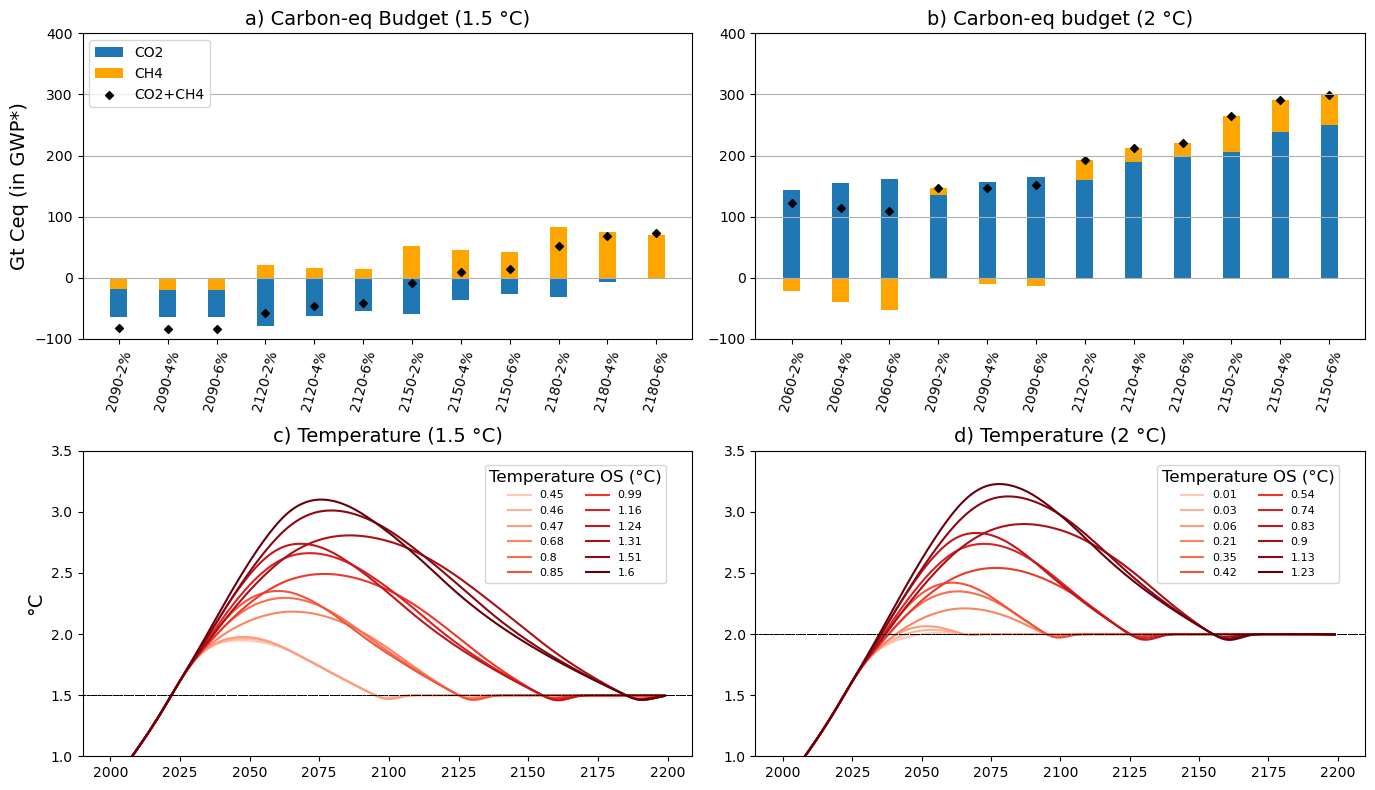

In [17]:
## -------------------- PLOT ---------------------##
import matplotlib.markers as mmark

x = np.arange(len(df_OS_allghg_15))  # the label locations
width = 0.35  # the width of the bars

# Plot configuration
width_inch = 14
height_inch = 8

fig, ax = plt.subplots(2, 2, figsize=(width_inch, height_inch))
title = 'ACC2 multi-gas simulation - Carbon Budget, IPSL emulation'

## -- FIRST PLOT
ax[0,0].bar(x - width/2, df_OS_allghg_15.CO2_OS, width, align='edge', label='CO2', color='tab:blue')
ax[0,0].bar(x - width/2, df_OS_allghg_15.CH4_OS, width, align='edge', label='CH4', color = 'orange')
ax[0,0].scatter(x, df_OS_allghg_15.GHG_OS, color='black', marker = "D", s = 16)
# ax[0,0].bar(x[-1] - width/2, df_OS_allghg_15.iloc[-1].CH4_OS, width, bottom = df_OS_allghg_15.CO2_OS, align='edge',color = 'orange')
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0,0].set_xlabel('Overshoot scenarios', size = 14)
ax[0,0].set_ylabel('Gt Ceq (in GWP*)', size = 14)
ax[0,0].set_xticks(x, ticks, rotation = 75)
ax[0,0].grid(axis = 'y')
ax[0,0].set_ylim(-100,400)
# Combine multiple axes labels in a single legend
lines, labels = ax[0,0].get_legend_handles_labels()          
ax[0,0].legend(lines + mark, labels + ["CO2+CH4"], loc="upper left")
# ax[0,0].legend(OS_temp_15_mag, title = "OS magnitude", title_fontsize = 14,bbox_to_anchor=(0.65, 1),fontsize=8, ncol=2)

## -- SECOND PLOT
ax[0,1].bar(x - width/2, df_OS_allghg_2.CO2_OS, width, align='edge', label='CO2', color='tab:blue')
ax[0,1].bar(x[0:3] - width/2, df_OS_allghg_2.iloc[0:3].CH4_OS, width, align='edge', label='CH4', color = 'orange')
ax[0,1].bar(x[4:6] - width/2, df_OS_allghg_2.iloc[4:6].CH4_OS, width, align='edge', label='CH4', color = 'orange')
ax[0,1].bar(x[3] - width/2, df_OS_allghg_2.iloc[3].CH4_OS, width, bottom = df_OS_allghg_2.iloc[3].CO2_OS, align='edge', label='CH4', color = 'orange')
ax[0,1].bar(x[6:] - width/2, df_OS_allghg_2.iloc[6:].CH4_OS, width, bottom = df_OS_allghg_2.iloc[6:].CO2_OS, align='edge', label='CH4', color = 'orange')
ax[0,1].scatter(x, df_OS_allghg_2.GHG_OS, color='black', marker = "D", s = 16)
# Add some text for labels, title and custom x-axis tick labels, etc.
# ax[0,1].set_xlabel('Overshoot scenarios', size = 14)
# ax[0,1].set_ylabel('Mt C (CO2)')
ax[0,1].set_xticks(x, ticks_2, rotation = 75)
ax[0,1].grid(axis = 'y')
ax[0,1].set_ylim(-100,400)
# Combine multiple axes labels in a single legend
# lines, labels = ax[0,1].get_legend_handles_labels()

## --  THIRD PLOT
color = iter(cm.Reds(np.linspace(0.2, 1, len(x))))
for scn in np.sort(df_all_15.TARGET.unique()):
    for d in df_all_15.DR.unique():
        c = next(color)
        data = df_all_15
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        t2m = data["T2M"]
        ax[1,0].plot(year[0:200],t2m[0:200], color = c)
        ax[1,0].axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
        ax[1,0].set_ylim(1,3.5)
        ax[1,0].set_ylabel('°C', size = 14)


legend2 = df_OS_allghg_15.T2M_OS.astype(float).round(2)
ax[1,0].legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,bbox_to_anchor=(0.65, 0.55),fontsize=8, ncol=2)

## --  FOURTH PLOT
# color = plt.cm.Reds(np.linspace(0, 1, len(targets)))
color = None
color = iter(cm.Reds(np.linspace(0.2, 1, len(x))))
for i, scn in enumerate(np.sort(df_all_20.TARGET.unique())):
    for d in df_all_20.DR.unique():
        c = next(color)
        data = df_all_20
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        t2m = data["T2M"]
        ax[1,1].plot(year[0:200],t2m[0:200], color = c)
        ax[1,1].axhline(2, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
        ax[1,1].set_xlim(1990,2210)
        ax[1,1].set_ylim(1,3.5)

legend3 = df_OS_allghg_2.T2M_OS.astype(float).round(2)
ax[1,1].legend(legend3, title = "Temperature OS (°C)", title_fontsize = 12,bbox_to_anchor=(0.65, 0.55),fontsize=8, ncol=2)

ax[0,0].set_title('a) Carbon-eq Budget (1.5 °C)', size = 14)
ax[0,1].set_title('b) Carbon-eq budget (2 °C)', size = 14)
ax[1,0].set_title('c) Temperature (1.5 °C)', size = 14)
ax[1,1].set_title('d) Temperature (2 °C)', size = 14)


fig.subplots_adjust(bottom=0.2)
# fig.suptitle(title, size = 16)
fig.tight_layout()

#ax.bar_label(co215, padding=3)
#ax.bar_label(ch415, padding=3)

# output file
# output_file = os.path.join(out_path,title.replace(' ','_')) + "_allghg_stack_Threshold_return_budget.png"

# save the output file
# plt.savefig(output_file)
plt.show()
plt.close()

## Simulations with alternate fixed CH4 and CO2 emissions

Here ACC2 acts as an Emulator of ESMs

### Open Data

Please note that CH4 only 1.5 °C simulations are run until 2300, rather than 2500

In [59]:
path = "/ACC2_ssp_rcp_standard_overshoot_CH4_15/"
all_files = []
all_files = glob.glob(os.path.join(data_path + path +"out_future_CNRM_ch4_1.5_*.csv"))
# df = pd.concat((pd.read_csv(f, delim_whitespace=True) for f in all_files), ignore_index=True)

dfs = list()
for f in all_files:
    data = pd.read_csv(f,  delim_whitespace=True)
    # .stem is method for pathlib objects to get the filename w/o the extension
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)
df_ch4_15 = pd.concat(dfs, ignore_index=True)

path = "/ACC2_ssp_rcp_standard_overshoot_CH4_20/"
all_files = glob.glob(os.path.join(data_path + path + "out_future_CNRM_ch4_2.0_*.csv"))
# df = pd.concat((pd.read_csv(f, delim_whitespace=True) for f in all_files), ignore_index=True)
dfs = list()
for f in all_files:
    data = pd.read_csv(f, delim_whitespace=True)
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)
df_ch4_20 = pd.concat(dfs, ignore_index=True)

path = "/ACC2_ssp_rcp_standard_overshoot_CO2_15/"
all_files = glob.glob(os.path.join(data_path + path + "out_future_CNRM_co2_1.5_*.csv"))
# df = pd.concat((pd.read_csv(f, delim_whitespace=True) for f in all_files), ignore_index=True)
dfs = list()
for f in all_files:
    data = pd.read_csv(f, delim_whitespace=True)
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)
df_co2_15 = pd.concat(dfs, ignore_index=True)

path = "/ACC2_ssp_rcp_standard_overshoot_CO2_20/"
all_files = glob.glob(os.path.join(data_path + path + "out_future_CNRM_co2_2.0*.csv"))
# df = pd.concat((pd.read_csv(f, delim_whitespace=True) for f in all_files), ignore_index=True)
dfs = list()
for f in all_files:
    data = pd.read_csv(f, delim_whitespace=True)
    data['SCEN'] = os.path.basename(f).split('_')[4]
    data['TARGET'] = os.path.basename(f).split('_')[5]
    data['DR'] = os.path.basename(f).split('_')[6]
    dfs.append(data)
df_co2_20 = pd.concat(dfs, ignore_index=True)

# Convert TARGET and DR columns to integers
df_ch4_15.TARGET = df_ch4_15.TARGET.astype(int)
df_ch4_15.DR = df_ch4_15.DR.astype(int)
df_ch4_20.TARGET = df_ch4_20.TARGET.astype(int)
df_ch4_20.DR = df_ch4_20.DR.astype(int)

df_co2_15.TARGET = df_co2_15.TARGET.astype(int)
df_co2_15.DR = df_co2_15.DR.astype(int)
df_co2_20.TARGET = df_co2_20.TARGET.astype(int)
df_co2_20.DR = df_co2_20.DR.astype(int)

In [28]:
# Define sets of targets and discount rates values

targets = sorted(df_co2_20["TARGET"].unique()); targets
drates = sorted(df_co2_20["DR"].unique()); drates


[2, 4, 6]

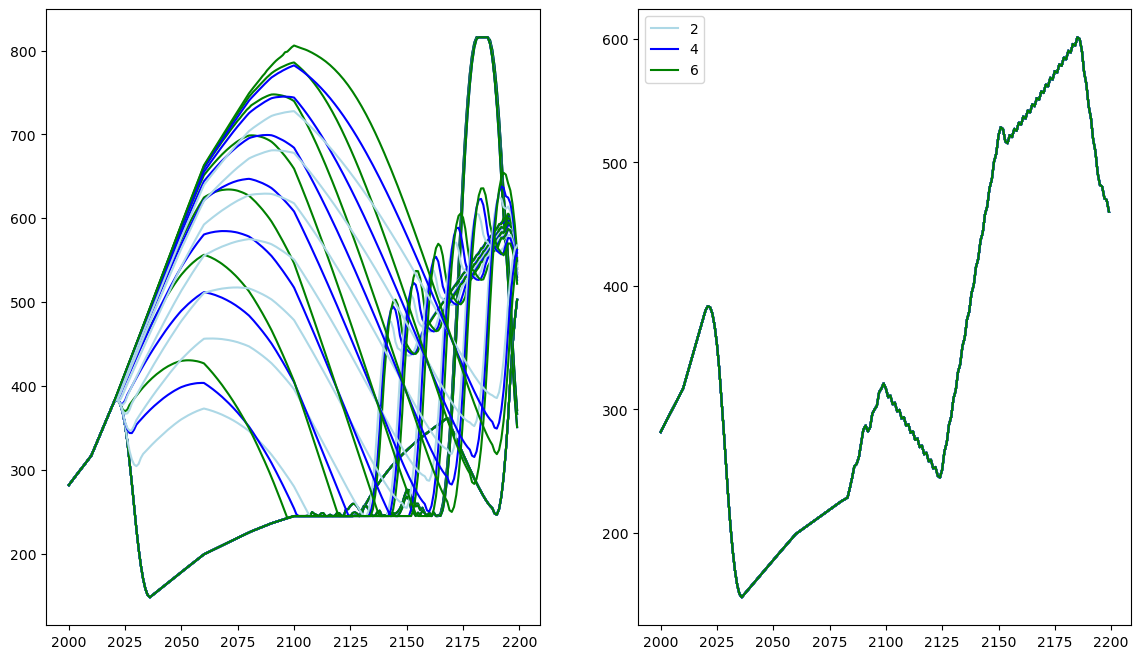

In [21]:
targets = sorted(map(int, (df_ch4_15["TARGET"].unique())))
drates = sorted(map(int, (df_ch4_15["DR"].unique())))

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)

colors = ['lightblue','blue','green','orange','red','brown']
ax = fig.add_subplot(gs[0, 0])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_ch4_15[df_ch4_15["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["ANTCH4"]#.cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

ax = fig.add_subplot(gs[0, 1])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_ch4_20[df_ch4_20["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["ANTCH4"]#.cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

    ax.legend(drates)

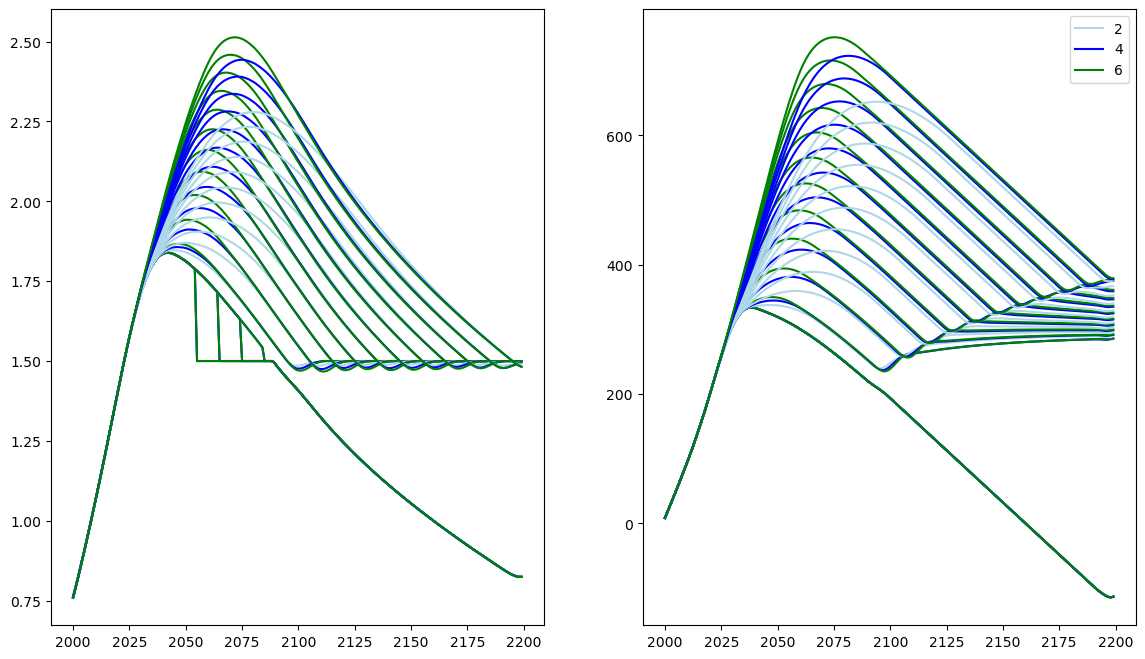

In [22]:
targets = sorted(map(int, (df_co2_15["TARGET"].unique())))
drates = sorted(map(int, (df_co2_15["DR"].unique())))

fig = plt.figure(figsize=(14, 8))
gs = gridspec.GridSpec(1, 2)

colors = ['lightblue','blue','green','orange','red','brown']
ax = fig.add_subplot(gs[0, 0])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_co2_15[df_co2_15["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["T2M"]#.cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

ax = fig.add_subplot(gs[0, 1])
for scn in targets:
    for i,dr in enumerate(list(drates)):
        data = df_co2_15[df_co2_15["TARGET"] == scn]
        year = data[data['DR'] == dr]["YEAR"]
        em = data[data['DR'] == dr]["ANTCO2"].cumsum()
        c = colors[i]
        ax.plot(year[0:200],em[0:200], color = c)

    ax.legend(drates)

#### CO2 CARBON BUDGET

In [60]:
df_OS_co2_2 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'GHG_OS', 'CO2_OS', 'CH4_OS'])
df_OS_co2_2.TARGET = targets
df_OS_co2_2=df_OS_co2_2.reindex(df_OS_co2_2.index.repeat(len(drates)))


dfs = []
for scn in targets:

    # Assign DR values for every target
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'DR'] = np.array(drates)

    data = df_co2_20[df_co2_20["TARGET"] == scn].copy()

    overshoot = []; osco2 = []; osch4 = []; t2m_os = []
    tcre_pos = []; tcre_neg = []; tcreplus_pos = []; tcreplus_neg = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative N2O emissions
        data1['CUMN2O'] = np.cumsum(data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        # Cumulative CO2+CH4 emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']+data1['CUMN2O']
        # Total GHG
        data1['GHG'] = (data1.ANTCO2) + (gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC) + (data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)

        ## OVERSHOOT calculation
        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=2).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()
        # Threshold exceeding GHG Carbon Budget
        over = (data1['CUMGHG'][afteros] - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        overco2 = (data1['CUMCO2'][afteros] - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 2)
        # Populate the list
        overshoot.append(over)
        osco2.append(overco2)
        osch4.append(overch4)
        t2m_os.append(t2m_over)

        ## TCRE calculation
        # Peak cumghg
        maximum = (data1['GHG']<0).idxmax()
        # Lowest Peak cumghg
        minimum = data1[data1['YEAR'] == (2000 + scn -1)].index[0]
        # TCRE+ and TCRE-
        tplus_pos = (data1['T2M'][maximum]/data1['CUMGHG'][maximum])*1000
        tplus_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMGHG'][minimum] - data1['CUMGHG'][maximum]))*1000
        t_pos = (data1['T2M'][maximum]/data1['CUMCO2'][maximum])*1000
        t_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMCO2'][minimum] - data1['CUMCO2'][maximum]))*1000
        # Populate the list
        tcre_pos.append(t_pos)
        tcre_neg.append(t_neg)
        tcreplus_pos.append(tplus_pos)
        tcreplus_neg.append(tplus_neg)
            
        dfs.append(data1)

    # Populate the dataframe with overshoot amounts
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'GHG_OS'] = np.array(overshoot)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'CO2_OS'] = np.array(osco2)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'TCRE+'] = np.array(tcre_pos)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'TCRE-'] = np.array(tcre_neg)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'TCREplus+'] = np.array(tcreplus_pos)
    df_OS_co2_2.loc[df_OS_co2_2['TARGET'] == scn, 'TCREplus-'] = np.array(tcreplus_neg)
df_tcre_co2_2 = pd.concat(dfs, ignore_index=True)


df_OS_co2_15 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'GHG_OS', 'CO2_OS', 'CH4_OS'])
df_OS_co2_15.TARGET = targets
df_OS_co2_15=df_OS_co2_15.reindex(df_OS_co2_15.index.repeat(len(drates)))

dfs = []
for scn in targets:

    # Assign DR values for every target
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'DR'] = np.array(drates)

    data = df_co2_15[df_co2_15["TARGET"] == scn].copy()

    overshoot = []; osco2 = []; osch4 = []; t2m_os = []
    tcre_pos = []; tcre_neg = []; tcreplus_pos = []; tcreplus_neg = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative N2O emissions
        data1['CUMN2O'] = np.cumsum(data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        # Cumulative CO2+CH4 emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']+data1['CUMN2O']
        # Total GHG
        data1['GHG'] = (data1.ANTCO2) + (gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC) + (data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)

        ## OVERSHOOT calculation
        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=1.5).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()
        # Threshold exceeding GHG Carbon Budget
        over = (data1['CUMGHG'][afteros] - data1['CUMGHG'][data1['CUMGHG'].index[0]+20])
        overco2 = (data1['CUMCO2'][afteros] - data1['CUMCO2'][data1['CUMCO2'].index[0]+20])
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 1.5)
        overshoot.append(over)
        osco2.append(overco2)
        osch4.append(overch4)
        t2m_os.append(t2m_over)

        ## TCRE calculation
        # Peak cumghg
        maximum = (data1['GHG']<0).idxmax()
        # Lowest Peak cumghg
        minimum = data1[data1['YEAR'] == (2000 + scn -1)].index[0]
        # TCRE+ and TCRE-
        tplus_pos = (data1['T2M'][maximum]/data1['CUMGHG'][maximum])*1000
        tplus_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMGHG'][minimum] - data1['CUMGHG'][maximum]))*1000
        t_pos = (data1['T2M'][maximum]/data1['CUMCO2'][maximum])*1000
        t_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMCO2'][minimum] - data1['CUMCO2'][maximum]))*1000
        # Populate the list
        tcre_pos.append(t_pos)
        tcre_neg.append(t_neg)
        tcreplus_pos.append(tplus_pos)
        tcreplus_neg.append(tplus_neg)

        dfs.append(data1)

    # Populate the dataframe with overshoot amounts
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'GHG_OS'] = np.array(overshoot)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'CO2_OS'] = np.array(osco2)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'TCRE+'] = np.array(tcre_pos)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'TCRE-'] = np.array(tcre_neg)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'TCREplus+'] = np.array(tcreplus_pos)
    df_OS_co2_15.loc[df_OS_co2_15['TARGET'] == scn, 'TCREplus-'] = np.array(tcreplus_neg)
df_tcre_co2_15 = pd.concat(dfs, ignore_index=True)


#### CH4 CARBON BUDGET

In [61]:
df_OS_ch4_2 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'CH4_OS'])
df_OS_ch4_2.TARGET = targets
df_OS_ch4_2=df_OS_ch4_2.reindex(df_OS_ch4_2.index.repeat(len(drates)))

dfs = []
for scn in targets:

    # Assign DR values for every target
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'DR'] = np.array(drates)

    data = df_ch4_20[df_ch4_20["TARGET"] == scn].copy()

    osch4 = []; t2m_os = []
    tcre_pos = []; tcre_neg = []; tcreplus_pos = []; tcreplus_neg = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative N2O emissions
        data1['CUMN2O'] = np.cumsum(data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        # Cumulative CO2+CH4 emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']+data1['CUMN2O']
        # Total GHG
        data1['GHG'] = (data1.ANTCO2) + (gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC) + (data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)

        ## OVERSHOOT calculation
        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=2).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()
        # Threshold exceeding GHG Carbon Budget
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 2)
        # Populate the list
        osch4.append(overch4)
        t2m_os.append(t2m_over)

        ## TCRE calculation
        # Peak cumghg
        maximum = (data1['GHG']<0).idxmax()
        # Lowest Peak cumghg
        minimum = data1[data1['YEAR'] == (2000 + scn -1)].index[0]
        # TCRE+ and TCRE-
        tplus_pos = (data1['T2M'][maximum]/data1['CUMGHG'][maximum])*1000
        tplus_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMGHG'][minimum] - data1['CUMGHG'][maximum]))*1000
        t_pos = (data1['T2M'][maximum]/data1['CUMCO2'][maximum])*1000
        t_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMCO2'][minimum] - data1['CUMCO2'][maximum]))*1000
        # Populate the list
        tcre_pos.append(t_pos)
        tcre_neg.append(t_neg)
        tcreplus_pos.append(tplus_pos)
        tcreplus_neg.append(tplus_neg)

        dfs.append(data1)
        
    # Populate the dataframe with overshoot amounts
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'TCRE+'] = np.array(tcre_pos)
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'TCRE-'] = np.array(tcre_neg)
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'TCREplus+'] = np.array(tcreplus_pos)
    df_OS_ch4_2.loc[df_OS_ch4_2['TARGET'] == scn, 'TCREplus-'] = np.array(tcreplus_neg)
df_tcre_ch4_2 = pd.concat(dfs, ignore_index=True)



df_OS_ch4_15 = pd.DataFrame(columns = ['TARGET', 'DR', 'T2M_OS', 'CH4_OS'])
df_OS_ch4_15.TARGET = targets
df_OS_ch4_15=df_OS_ch4_15.reindex(df_OS_ch4_15.index.repeat(len(drates)))

dfs = []
for scn in targets:

    # Assign DR values for every target
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'DR'] = np.array(drates)
    data = df_ch4_15[df_ch4_15["TARGET"] == scn].copy()

    osch4 = []; t2m_os = []
    tcre_pos = []; tcre_neg = []; tcreplus_pos = []; tcreplus_neg = []
    for dr in drates:

        data1 = data[data["DR"] == dr]
        # Cumulative CO2 emissions
        data1['CUMCO2'] = np.cumsum(data1.ANTCO2)
        # Cumulative CH4 emissions
        data1['CUMCH4'] = np.cumsum(gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        # Cumulative N2O emissions
        data1['CUMN2O'] = np.cumsum(data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        # Cumulative CO2+CH4+N2O emissions
        data1['CUMGHG'] = data1['CUMCO2']+data1['CUMCH4']+data1['CUMN2O']
        # Total GHG
        data1['GHG'] = (data1.ANTCO2) + (gwpstar(data1.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC) + (data1['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)

        ## OVERSHOOT calculation
        # First data after T2M overshoot
        afteros = (data1.T2M[50:]<=1.5).idxmax()+1
        # Peak temperature
        peak = (data1.T2M[50:]).idxmax()
        # Threshold exceeding GHG Carbon Budget
        overch4 = (data1['CUMCH4'][afteros] - data1['CUMCH4'][data1['CUMCH4'].index[0]+20])
        # Temperature overshoot
        t2m_over = (data1['T2M'][peak] - 1.5)
        # Populate list 
        osch4.append(overch4)
        t2m_os.append(t2m_over)

        ## TCRE calculation
        # Peak cumghg
        maximum = (data1['GHG']<0).idxmax()
        # Lowest Peak cumghg
        minimum = data1[data1['YEAR'] == (2000 + scn -1)].index[0]
        # TCRE+ and TCRE-
        tplus_pos = (data1['T2M'][maximum]/data1['CUMGHG'][maximum])*1000
        tplus_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMGHG'][minimum] - data1['CUMGHG'][maximum]))*1000
        t_pos = (data1['T2M'][maximum]/data1['CUMCO2'][maximum])*1000
        t_neg = ((data1['T2M'][minimum] - data1['T2M'][maximum])/(data1['CUMCO2'][minimum] - data1['CUMCO2'][maximum]))*1000
        # Populate the list
        tcre_pos.append(t_pos)
        tcre_neg.append(t_neg)
        tcreplus_pos.append(tplus_pos)
        tcreplus_neg.append(tplus_neg)

        dfs.append(data1)

    # Populate the dataframe with overshoot amounts
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'CH4_OS'] = np.array(osch4)
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'T2M_OS'] = np.array(t2m_os)
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'TCRE+'] = np.array(tcre_pos)
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'TCRE-'] = np.array(tcre_neg)
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'TCREplus+'] = np.array(tcreplus_pos)
    df_OS_ch4_15.loc[df_OS_ch4_15['TARGET'] == scn, 'TCREplus-'] = np.array(tcreplus_neg)
df_tcre_ch4_15 = pd.concat(dfs, ignore_index=True)


Effect of OS magnitude on Carbon Budget

In [172]:
for scn in targets:

    cb_diff = (df_OS_co2_2[df_OS_co2_2.TARGET == scn].CO2_OS.max() - df_OS_co2_2[df_OS_co2_2.TARGET == scn].CO2_OS.min())
    # cb_diff = (df_OS_co2_15[df_OS_co2_15.TARGET == scn].CO2_OS.max() - df_OS_co2_15[df_OS_co2_15.TARGET == scn].CO2_OS.min())
    # cb_diff = (df_OS_ch4_15[df_OS_ch4_15.TARGET == scn].CH4_OS.max() - df_OS_ch4_15[df_OS_ch4_15.TARGET == scn].CH4_OS.min())
    cb_diff = (df_OS_ch4_2[df_OS_ch4_2.TARGET == scn].CH4_OS.max() - df_OS_ch4_2[df_OS_ch4_2.TARGET == scn].CH4_OS.min())

    print(f"{cb_diff}")


0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
2.897237127273087
8.937987163636421
8.814611018181267
1.9309309090904208
10.329944290909225


### OS>2100 Barplot of Carbon Budget & plots of temperature pathways  

Retain only some combinations of Overshoot TARGET and DR

In [62]:
df_OS_co2_15 = df_OS_co2_15[(df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 176) | (df_OS_co2_15.TARGET == 196)]
df_OS_co2_15 = df_OS_co2_15[(df_OS_co2_15.DR == 2) | (df_OS_co2_15.DR == 4) | (df_OS_co2_15.DR == 6)]
df_co2_15 = df_co2_15[(df_co2_15.TARGET == 156) | (df_co2_15.TARGET == 176) | (df_co2_15.TARGET == 196) ]
df_co2_15 = df_co2_15[(df_co2_15.DR == 2) | (df_co2_15.DR == 4) | (df_co2_15.DR == 6)]

# df_OS_co2_2 = df_OS_co2_2[(df_OS_co2_2.TARGET == 66) | (df_OS_co2_2.TARGET == 156) | (df_OS_co2_2.TARGET == 176) | (df_OS_co2_2.TARGET == 196)]
# df_OS_co2_2 = df_OS_co2_2[(df_OS_co2_2.DR == 2) | (df_OS_co2_2.DR == 4) | (df_OS_co2_2.DR == 6)]
# df_co2_20 = df_co2_20[(df_co2_20.TARGET == 66) | (df_co2_20.TARGET == 156) | (df_co2_20.TARGET == 176) | (df_co2_20.TARGET == 196)]
# df_co2_20 = df_co2_20[(df_co2_20.DR == 2) | (df_co2_20.DR == 4) | (df_co2_20.DR == 6)]

In [63]:
df_OS_ch4_15 = df_OS_ch4_15[(df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)]
df_OS_ch4_15 = df_OS_ch4_15[(df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6)]
df_ch4_15 = df_ch4_15[(df_ch4_15.TARGET == 156) | (df_ch4_15.TARGET == 176) | (df_ch4_15.TARGET == 196)]
df_ch4_15 = df_ch4_15[(df_ch4_15.DR == 2) | (df_ch4_15.DR == 4) | (df_ch4_15.DR == 6)]

# df_OS_ch4_2 = df_OS_ch4_2[(df_OS_ch4_2.TARGET == 156) | (df_OS_ch4_2.TARGET == 176) | (df_OS_ch4_2.TARGET == 196)]
# df_OS_ch4_2 = df_OS_ch4_2[(df_OS_ch4_2.DR == 2) | (df_OS_ch4_2.DR == 4) | (df_OS_ch4_2.DR == 6)]
# df_ch4_20 = df_ch4_20[(df_ch4_20.TARGET == 156) | (df_ch4_20.TARGET == 176) | (df_ch4_20.TARGET == 196)]
# df_ch4_20 = df_ch4_20[(df_ch4_20.DR == 2) | (df_ch4_20.DR == 4) | (df_ch4_20.DR == 6)]

Barplot of Carbon Budget & plots of temperature pathways  

In [64]:
ticks_co2_15 = ["2090-2%",  "2090-4%",  "2090-6%", "2120-2%", "2120-4%", "2120-6%", "2150-2%", "2150-4%", "2150-6%"]
ticks_co2_20 = ["2060-2%", "2060-4%", "2060-6%", "2090-2%",  "2090-4%",  "2090-6%", "2120-2%", "2120-4%", "2120-6%", "2150-2%", "2150-4%", "2150-6%"]

ticks_ch4 = ["2150-2%",  "2150-4%",  "2150-6%", "2170-2%", "2170-4%", "2170-6%", "2190-2%", "2190-4%", "2190-6%"]

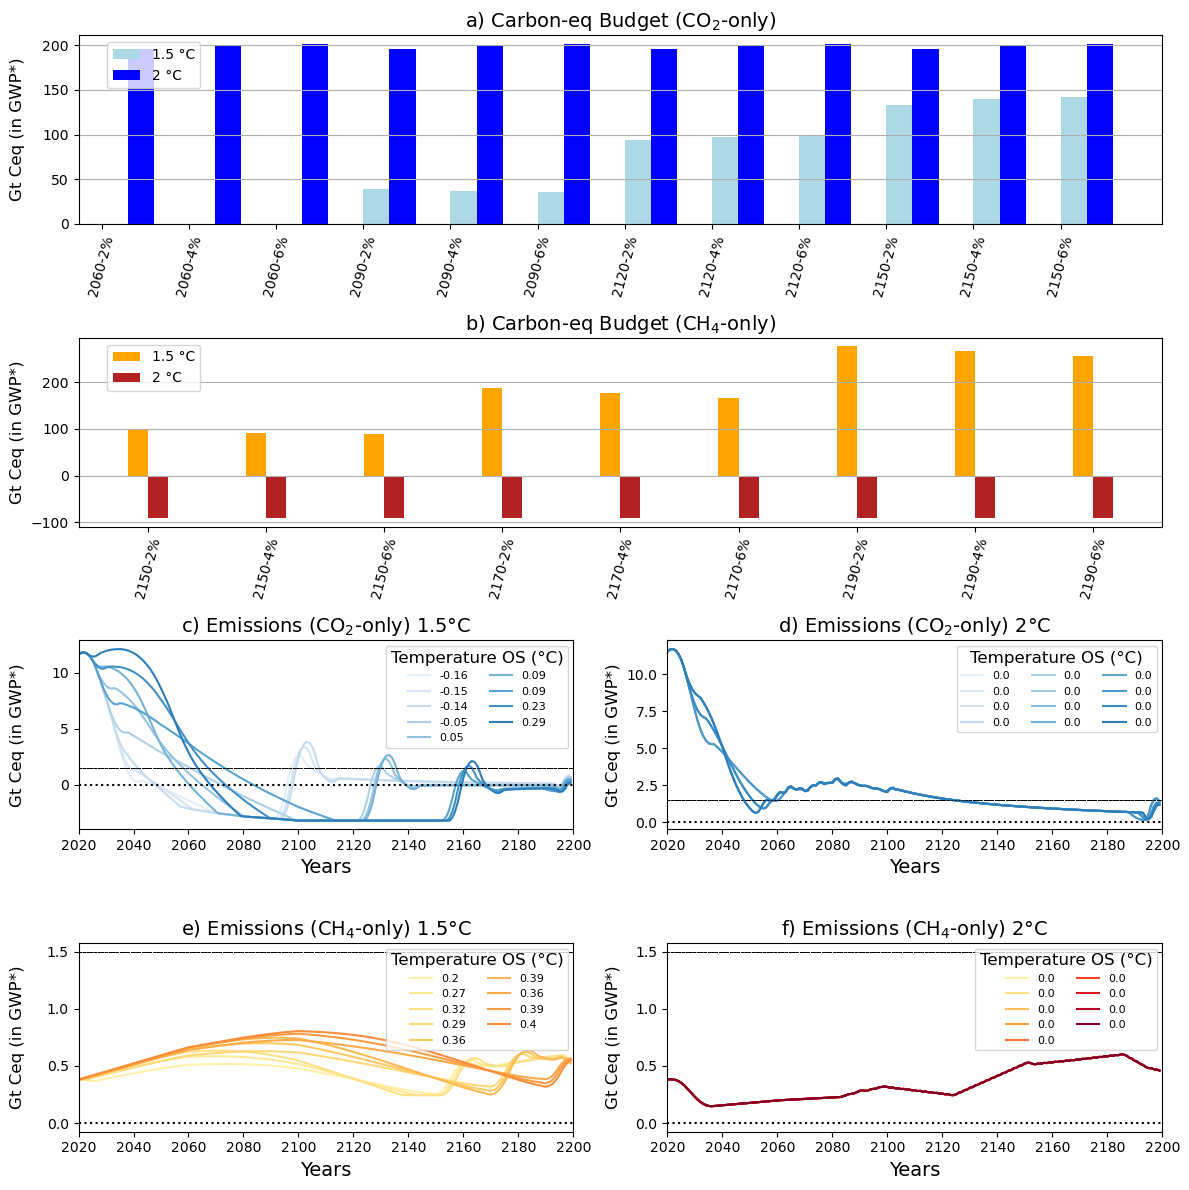

In [15]:
## -------------------- PLOT ---------------------##

# Plot configuration
width_inch = 12
height_inch = 12

model = "CNRM"
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(4, 2)

# First Plot CO2 Budget
x = np.arange(len(ticks_co2_15))  # the label locations
ax = fig.add_subplot(gs[0, :])
ax.bar(x+3, df_OS_co2_15.CO2_OS, width=0.3, align='edge', label='1.5 °C', color="lightblue")
x1 = np.arange(len(ticks_co2_20))  # the label locations
ax.bar(x1 + 0.3, df_OS_co2_2.CO2_OS, width=0.3, align='edge', label='2 °C', color="blue")

ax.set_title('a) Carbon-eq Budget (CO$_2$-only)', size = 14)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xticks(x1, ticks_co2_20, rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1))

# Second Plot CH4 Budget
x = np.arange(len(ticks_ch4))  # the label locations
ax = fig.add_subplot(gs[1, :])
ax.bar(x - 0.17, df_OS_ch4_15.CH4_OS, width=0.17, align='edge', label='1.5 °C', color="orange")
x1 = np.arange(len(ticks_ch4))  # the label locations
ax.bar(x1, df_OS_ch4_2.CH4_OS, width=0.17, align='edge', label='2 °C', color="firebrick")

ax.set_title('b) Carbon-eq Budget (CH$_4$-only)', size = 14)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xticks(x, ticks_ch4, rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1))

# Third Plot A CO2 Temp
ax = fig.add_subplot(gs[2, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.3, len(ticks_co2_15))))
for scn in np.sort(df_co2_15.TARGET.unique()):
    for d in df_co2_15.DR.unique():
        c = next(color)
        data = df_co2_15
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        em = data["ANTCO2"]
        ax.plot(year[0:200],em[0:200], color = c)
        ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
        # ax.set_ylim(1,3.5)
        ax.set_ylabel('°C', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
# ax.set_ylim(-6, 17)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('c) Emissions (CO$_2$-only) 1.5°C', size = 14)
legend2 = df_OS_co2_15.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)


# Third Plot B CO2 Temp
ax = fig.add_subplot(gs[2, 1])
color = iter(cm.Blues_r(np.linspace(0.9, 0.3, len(ticks_co2_20))))
for scn in np.sort(df_co2_20.TARGET.unique()):
    for d in df_co2_20.DR.unique():
        c = next(color)
        data = df_co2_20
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        em = data["ANTCO2"]
        ax.plot(year[0:200],em[0:200], color = c)
        ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
        # ax.set_ylim(1,3.5)
        ax.set_ylabel('°C', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
# ax.set_ylim(-6, 17)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('d) Emissions (CO$_2$-only) 2°C', size = 14)
legend2 = df_OS_co2_2.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=3) #bbox_to_anchor=(0.50, 0.4),


# Fourth Plot A CH4 Temp
ax = fig.add_subplot(gs[3, 0])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(ticks_ch4))))
for scn in df_ch4_15.TARGET.unique():
    for d in df_ch4_15.DR.unique():
        c = next(color)
        data = df_ch4_15
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        em = data.ANTCH4*MttoGt
        ax.plot(year[0:200],em[0:200], color = c)
        ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
# ax.set_ylim(-0.1,1.5)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('e) Emissions (CH$_4$-only) 1.5°C', size = 14)
legend2 = df_OS_ch4_15.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)


# Fourth Plot B CH4 Temp
ax = fig.add_subplot(gs[3, 1])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0, len(ticks_ch4))))
for scn in df_ch4_20.TARGET.unique():
    for d in df_ch4_20.DR.unique():
        c = next(color)
        data = df_ch4_20
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        em = data.ANTCH4*MttoGt
        ax.plot(year[0:200],em[0:200], color = c)
        ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
# ax.set_ylim(-0.1,1.5)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('f) Emissions (CH$_4$-only) 2°C', size = 14)
legend2 = df_OS_ch4_2.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)

fig.align_labels() 

# output file
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)
# output_file = os.path.join(out_path,title.replace(' ','_')) + "_ANT.png"

# save the output file
# plt.savefig(output_file)

Revised figure to account for unfeasible solutions

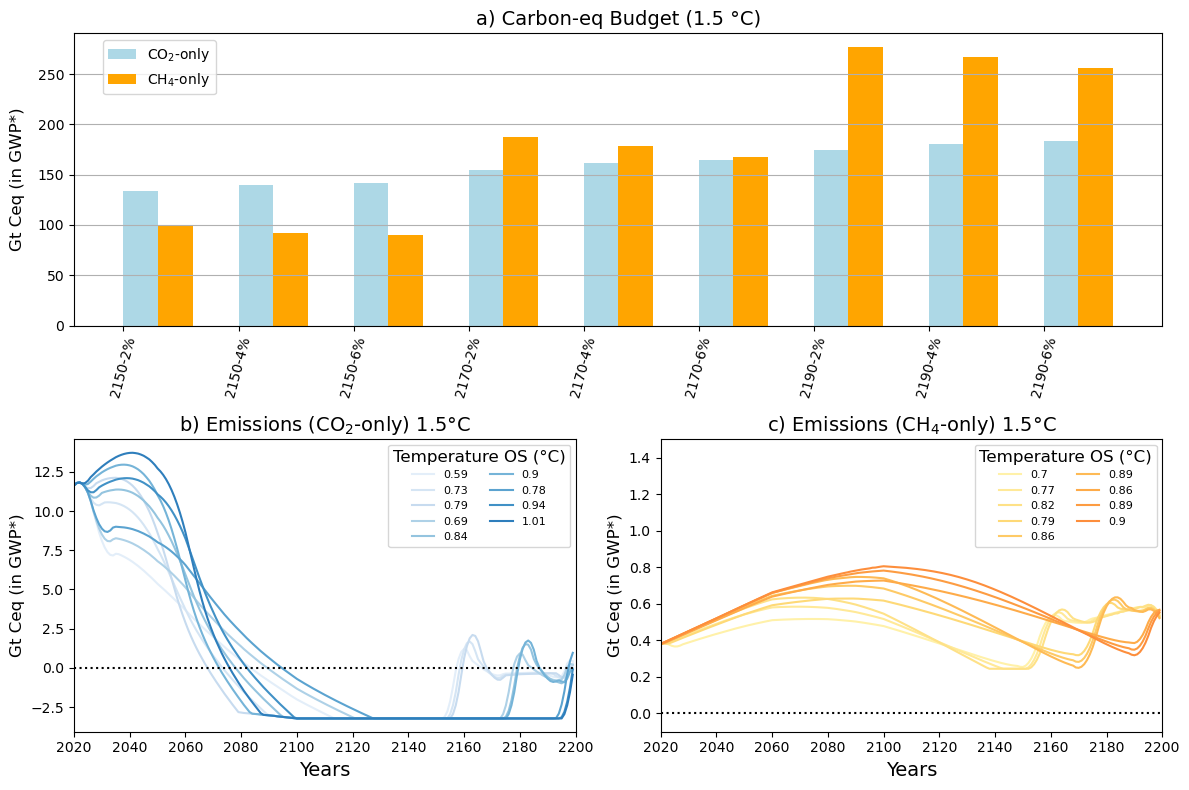

In [65]:
## -------------------- PLOT ---------------------##

# Plot configuration
width_inch = 12
height_inch = 8

model = "CNRM"
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# First Plot CO2 Budget
x = np.arange(len(ticks_co2_15))  # the label locations
ax = fig.add_subplot(gs[0, :])
ax.bar(x, df_OS_co2_15.CO2_OS, width=0.3, align='edge', label='CO$_2$-only', color="lightblue")
x1 = np.arange(len(ticks_ch4))  # the label locations
ax.bar(x1 + 0.3, df_OS_ch4_15.CH4_OS, width=0.3, align='edge', label='CH$_4$-only', color="orange")

ax.set_title('a) Carbon-eq Budget (1.5 °C)', size = 14)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xticks(x1, ticks_ch4, rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1))

# Second Plot A CO2 Emissions
ax = fig.add_subplot(gs[1, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.3, len(ticks_co2_15))))
for scn in np.sort(df_co2_15.TARGET.unique()):
    for d in df_co2_15.DR.unique():
        c = next(color)
        data = df_co2_15
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        em = data["ANTCO2"]
        ax.plot(year[0:200],em[0:200], color = c)
        # ax.set_ylim(1,3.5)
        ax.set_ylabel('°C', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
# ax.set_ylim(-6, 17)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('b) Emissions (CO$_2$-only) 1.5°C', size = 14)
legend2 = df_OS_co2_15.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)


# Third Plot B CH4 Emissions
ax = fig.add_subplot(gs[1, 1])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(ticks_ch4))))
for scn in df_ch4_15.TARGET.unique():
    for d in df_ch4_15.DR.unique():
        c = next(color)
        data = df_ch4_15
        data = data[data["TARGET"] == scn]
        data = data[data["DR"] == d]
        year = data["YEAR"]
        # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        em = data.ANTCH4*MttoGt
        ax.plot(year[0:200],em[0:200], color = c)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlim(2020, 2200)
ax.set_ylim(-0.1,1.5)
ax.set_ylabel('Gt Ceq (in GWP*)', size = 12)
ax.set_xlabel('Years', size = 14)
ax.set_title('c) Emissions (CH$_4$-only) 1.5°C', size = 14)
legend2 = df_OS_ch4_15.T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS (°C)", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)

fig.align_labels()

# output file
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)
# output_file = os.path.join(out_path,title.replace(' ','_')) + "_ANT.png"

# save the output file
# plt.savefig(output_file)

Legends outside figures

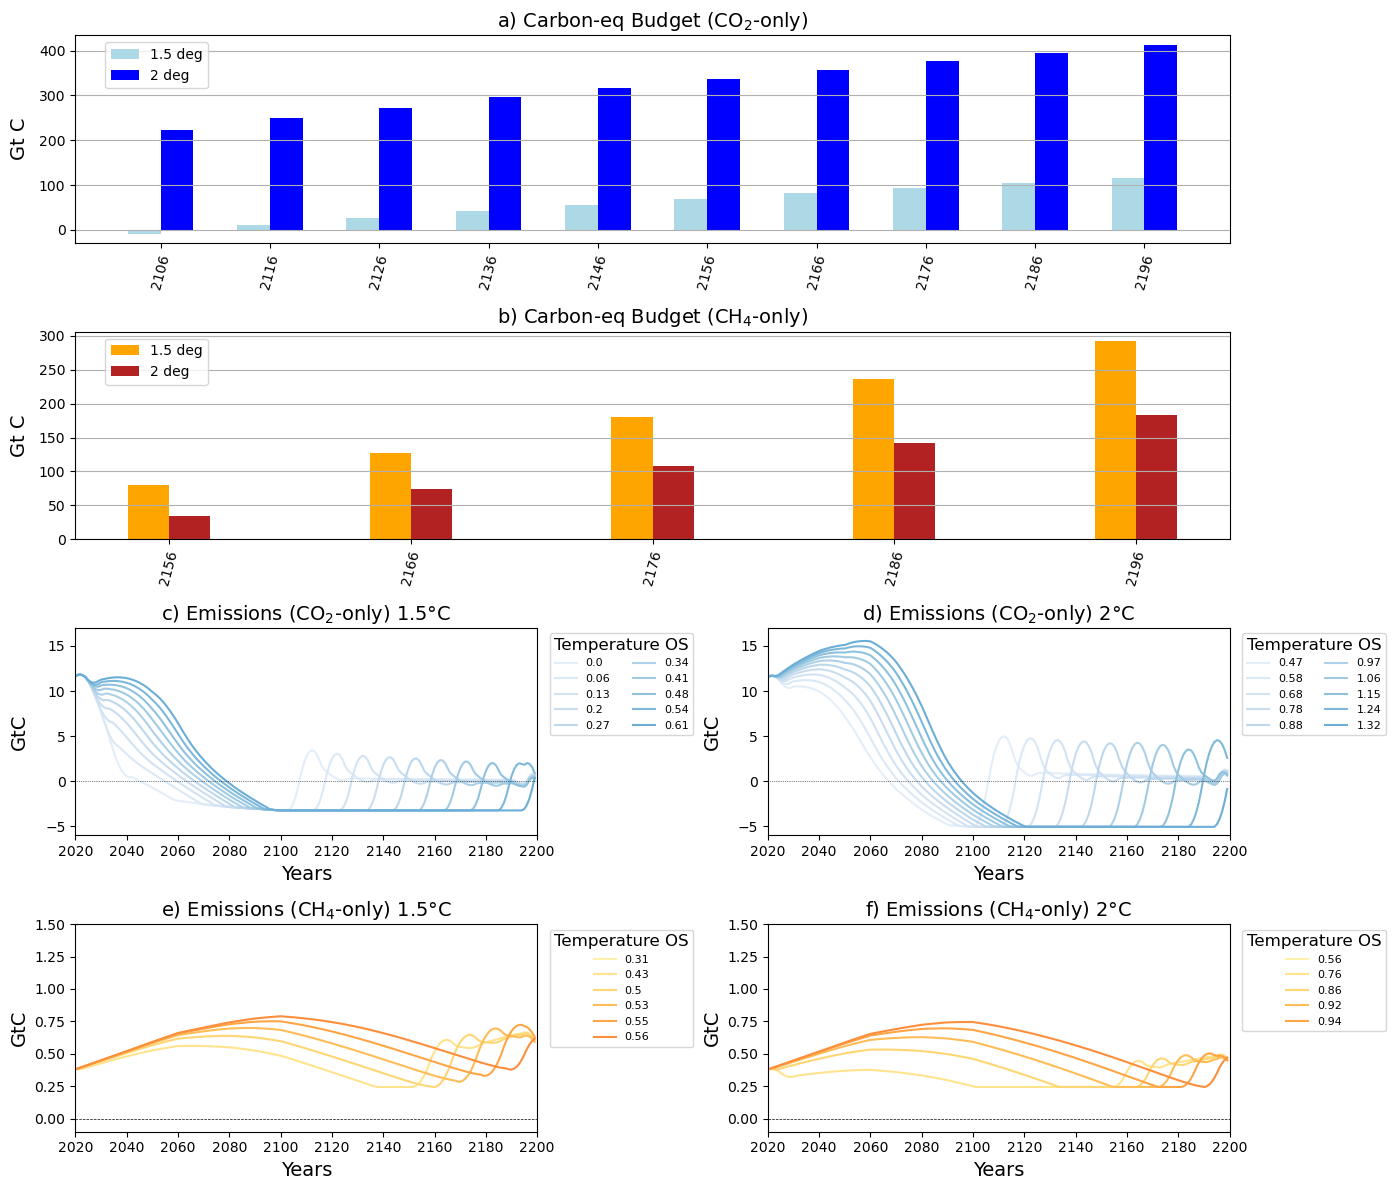

In [ ]:
## -------------------- PLOT ---------------------##

# Plot configuration
width_inch = 14
height_inch = 12

model = "IPSL"
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(4, 2)

# First Plot CO2 Budget
x = np.arange(len(targets_yrs[5:]))  # the label locations
ax = fig.add_subplot(gs[0, :])
ax.bar(x - 0.3, df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)].CO2_OS, width=0.3, align='edge', label='1.5 deg', color="lightblue")
x1 = np.arange(len(targets_yrs[5:]))  # the label locations
ax.bar(x1, df_OS_co2_2[(df_OS_co2_2.TARGET >= 106) & (df_OS_co2_2.DR == 4)].CO2_OS, width=0.3, align='edge', label='2 deg', color="blue")

ax.set_title('a) Carbon-eq Budget (CO$_2$-only)', size = 14)
ax.set_ylabel('Gt C', size = 14)
# ax.set_ylim(-100,OS_co2_20[-1]+50)
ax.set_xticks(x1, targets_yrs[5:], rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1))

# Second Plot CH4 Budget
x = np.arange(len(targets_yrs[10:]))  # the label locations
ax = fig.add_subplot(gs[1, :])
ax.bar(x - 0.17, df_OS_ch4_15[(df_OS_ch4_15.TARGET >= 156) & (df_OS_ch4_15.DR == 4)].CH4_OS, width=0.17, align='edge', label='1.5 deg', color="orange")
x1 = np.arange(len(targets_yrs[10:]))  # the label locations
ax.bar(x1, df_OS_ch4_2[(df_OS_ch4_2.TARGET >= 156) & (df_OS_ch4_2.DR == 4)].CH4_OS, width=0.17, align='edge', label='2 deg', color="firebrick")

ax.set_title('b) Carbon-eq Budget (CH$_4$-only)', size = 14)
ax.set_ylabel('Gt C', size = 14)
# ax.set_ylim(-100,OS_ch4_15[-1]+50)
ax.set_xticks(x, targets_yrs[10:], rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1))

# Third Plot A CO2 Temp
ax = fig.add_subplot(gs[2, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
for scn in targets[5:]:
    c = next(color)
    data = df_co2_15[(df_co2_15.TARGET >= 106) & (df_co2_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    em = data["ANTCO2"]
    ax.plot(year[0:200],em[0:200], color = c)
    ax.set_ylim(1,3.5)
    ax.set_ylabel('°C', size = 14)
ax.axhline(0, linestyle='dotted', color="black",linewidth = 0.5,)
ax.set_xlim(2020, 2200)
ax.set_ylim(-6, 17)
ax.set_ylabel('GtC', size = 14)
ax.set_xlabel('Years', size = 14)
ax.set_title('c) Emissions (CO$_2$-only) 1.5°C', size = 14)
legend2 = df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,bbox_to_anchor=[1.35, 1],loc="upper right",fontsize=8, ncol=2)


# Third Plot B CO2 Temp
ax = fig.add_subplot(gs[2, 1])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
for scn in targets[5:]:
    c = next(color)
    data = df_co2_20[(df_co2_15.TARGET >= 106) & (df_co2_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    em = data["ANTCO2"]
    ax.plot(year[0:200],em[0:200], color = c)
    ax.set_ylim(1,3.5)
    ax.set_ylabel('°C', size = 14)
ax.axhline(0, linestyle='dotted', color="black",linewidth = 0.5,)
ax.set_xlim(2020, 2200)
ax.set_ylim(-6, 17)
ax.set_ylabel('GtC', size = 14)
ax.set_xlabel('Years', size = 14)
ax.set_title('d) Emissions (CO$_2$-only) 2°C', size = 14)
legend2 = df_OS_co2_2[(df_OS_co2_2.TARGET >= 106) &(df_OS_co2_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,bbox_to_anchor=[1.35, 1],loc="upper right",fontsize=8, ncol=2) #bbox_to_anchor=(0.50, 0.4),


# Fourth Plot A CH4 Temp
ax = fig.add_subplot(gs[3, 0])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[9:]:
    c = next(color)
    data = df_ch4_15[(df_ch4_15.TARGET >= 156) & (df_ch4_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
    em = data.ANTCH4*MttoGt
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(-0.1,1.5)
ax.set_ylabel('GtC', size = 14)
ax.set_xlabel('Years', size = 14)
ax.set_title('e) Emissions (CH$_4$-only) 1.5°C', size = 14)
legend2 = df_OS_ch4_15[(df_OS_ch4_15.TARGET >= 146) & (df_OS_ch4_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12, bbox_to_anchor=[1.35, 1],loc="upper right",fontsize=8, ncol=1)


# Fourth Plot B CH4 Temp
ax = fig.add_subplot(gs[3, 1])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[9:]:
    c = next(color)
    data = df_ch4_20[(df_ch4_20.TARGET >= 156) & (df_ch4_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
    em = data.ANTCH4*MttoGt
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(-0.1,1.5)
ax.set_ylabel('GtC', size = 14)
ax.set_xlabel('Years', size = 14)
ax.set_title('f) Emissions (CH$_4$-only) 2°C', size = 14)
legend2 = df_OS_ch4_2[(df_OS_ch4_2.TARGET >= 156) & (df_OS_ch4_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12, bbox_to_anchor=[1.35, 1], loc="upper right",fontsize=8, ncol=1)

fig.align_labels() 

# output file
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)
# output_file = os.path.join(out_path,title.replace(' ','_')) + "_ANT.png"

# save the output file
# plt.savefig(output_file)

### Temperature Pathways

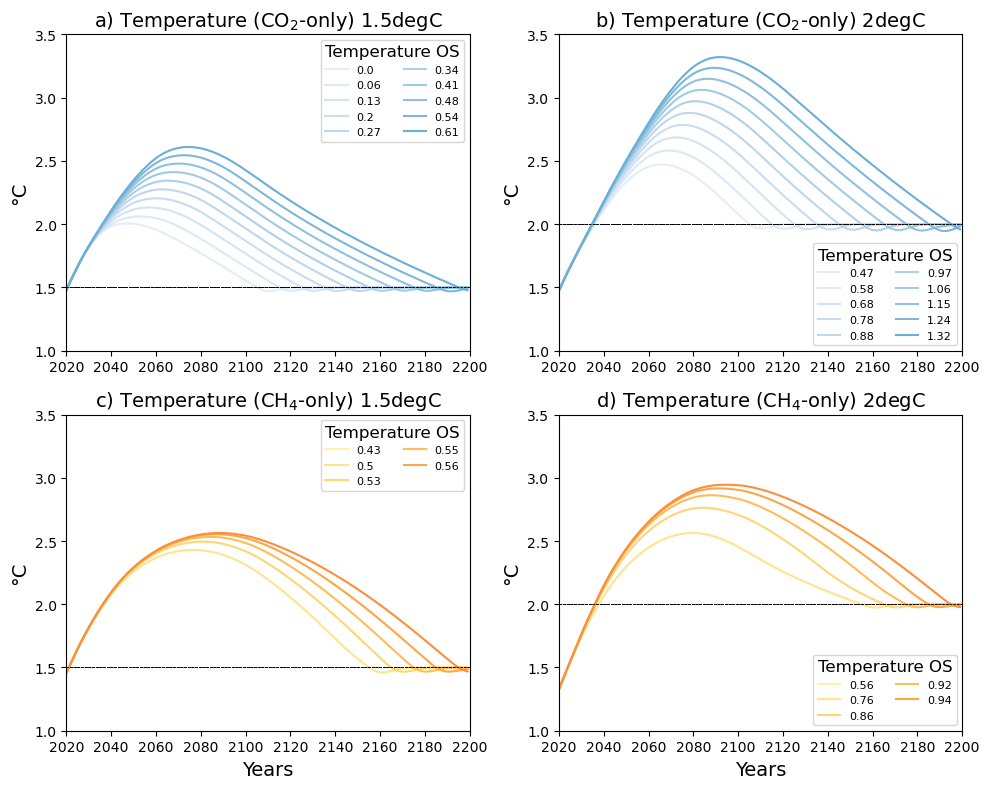

In [189]:
## -------------------- DATA ---------------------##
## -------------------- PLOT ---------------------##
#x = np.arange(len(columns_acc2))  # the label locations

# Plot configuration
width_inch = 10
height_inch = 8

#title = 'ACC2 CO$_2$ Emissions Simulations - Carbon Budget at {}'.format(targetOS GtC)

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

ylabel = '°C'
xlabel = 'Years'

# First Plot C02_15
ax = fig.add_subplot(gs[0, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
for scn in targets[5:]:
    c = next(color)
    data = df_co2_15[(df_co2_15.TARGET >= 106) & (df_co2_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    temp = data.T2M
    ax.plot(year[0:200],temp[0:200], color = c)
    ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(1,3.5)
ax.set_title('a) Temperature (CO$_2$-only) 1.5degC', size = 14)
ax.set_ylabel(ylabel, size = 14)
# overshoot = tas_co2_15_acc2.columns
legend2 = df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)

#ax.legend(loc='upper left')

# Second Plot C02_20 
ax = fig.add_subplot(gs[0, 1])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
for scn in targets[5:]:
    c = next(color)
    data = df_co2_20[(df_co2_20.TARGET >= 106) & (df_co2_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    temp = data.T2M
    ax.plot(year[0:200],temp[0:200], color = c)
    ax.axhline(2, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(1,3.5)
ax.set_title('b) Temperature (CO$_2$-only) 2degC', size = 14)
ax.set_ylabel(ylabel, size = 14)
# overshoot = tas_co2_20_acc2.columns
legend2 = df_OS_co2_2[(df_OS_co2_2.TARGET >= 106) & (df_OS_co2_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="lower right",fontsize=8, ncol=2)


# Third Plot CH4_15 
ax = fig.add_subplot(gs[1, 0])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[9:]:
    c = next(color)
    data = df_ch4_15[(df_ch4_15.TARGET >= 156) & (df_ch4_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    # em = (gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
    temp = data.T2M
    ax.plot(year[0:200],temp[0:200], color = c)
    ax.axhline(1.5, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(1,3.5)
ax.set_title('c) Temperature (CH$_4$-only) 1.5degC', size = 14)
ax.set_ylabel(ylabel, size = 14)
ax.set_xlabel(xlabel, size = 14)
# overshoot = tas_ch4_15_acc2.columns
legend2 = df_OS_ch4_15[(df_OS_ch4_15.TARGET >= 156) & (df_OS_ch4_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="upper right",fontsize=8, ncol=2)


# Fourth Plot CH4_20
ax = fig.add_subplot(gs[1, 1])
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[9:]:
    c = next(color)
    data = df_ch4_20[(df_ch4_20.TARGET >= 156) & (df_ch4_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    temp = data.T2M
    ax.plot(year[0:200],temp[0:200], color = c)
    ax.axhline(2, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_xlim(2020, 2200)
ax.set_ylim(1,3.5)
ax.set_title('d) Temperature (CH$_4$-only) 2degC', size = 14)
ax.set_ylabel(ylabel, size = 14)
ax.set_xlabel(xlabel, size = 14)
# overshoot = tas_ch4_20_acc2.columns
legend2 = df_OS_ch4_2[(df_OS_ch4_2.TARGET >= 156) & (df_OS_ch4_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="lower right",fontsize=8, ncol=2)

fig.align_labels()
title="ACC2 CO2+CH4 Emissions Simulations - Temperature Pathways - {} emulator".format(model)
# output file
output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

# save the output file
# plt.savefig(output_file)

### Scenarios before 2100

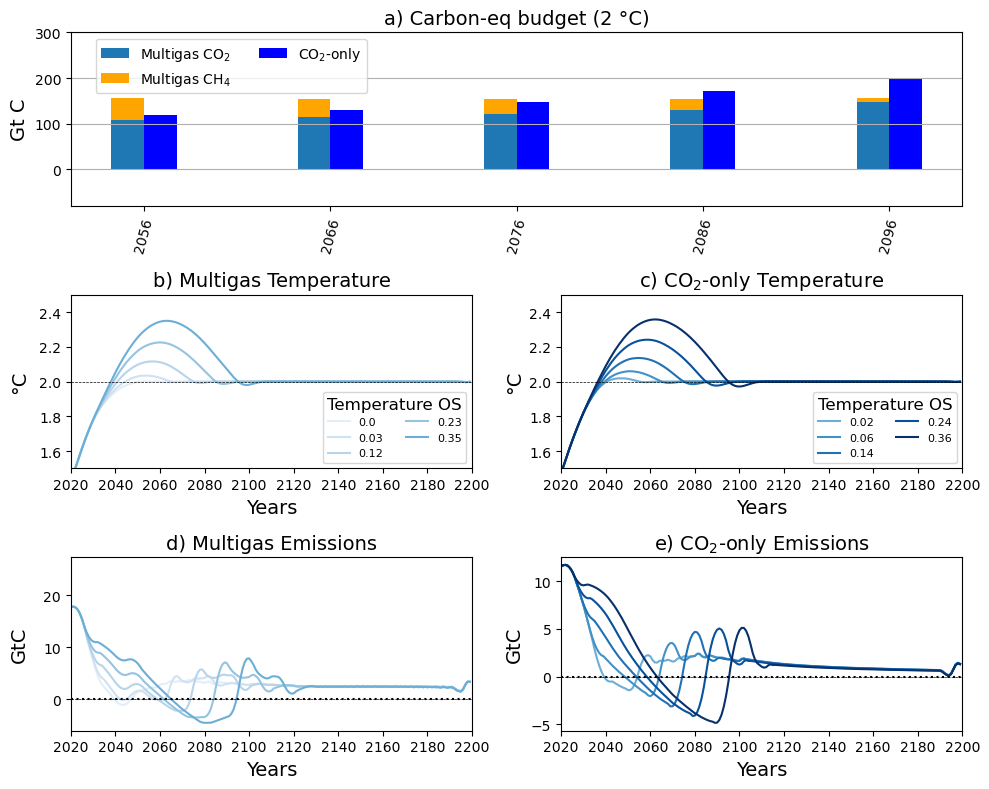

In [ ]:
## -------------------- PLOT ---------------------##

# Plot configuration
width_inch = 10
height_inch = 8

model = "IPSL"
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(3, 2)

# First Plot CO2 Budget
x = np.arange(len(targets_yrs[:5]))  # the label locations
ax = fig.add_subplot(gs[0, :])
ax.bar(x - width/2, df_OS_allghg_2[(df_OS_allghg_2.TARGET < 106) & (df_OS_allghg_2.DR == 4)].CO2_OS, width/2, align='edge', label='Multigas CO$_2$', color='tab:blue')
ax.bar(x - width/2, df_OS_allghg_2[(df_OS_allghg_2.TARGET < 106) & (df_OS_allghg_2.DR == 4)].CH4_OS, width/2, bottom = df_OS_allghg_2[(df_OS_allghg_2.TARGET < 106) & (df_OS_allghg_2.DR == 4)].CO2_OS, align='edge', label='Multigas CH$_4$', color = 'orange')
ax.bar(x, df_OS_co2_2[(df_OS_co2_2.TARGET < 106) & (df_OS_co2_2.DR == 4)].CO2_OS, width/2, align='edge', label='CO$_2$-only', color='blue')

ax.set_title('a) Carbon-eq budget (2 °C)', size = 14)
ax.set_ylabel('Gt C', size = 14)
ax.set_ylim(-80,300)
ax.set_xticks(x, targets_yrs[:5], rotation = 75)
ax.grid(axis = 'y')
ax.legend(loc='upper left',bbox_to_anchor=(0.02, 1), ncol = 2)

# Third Plot A CO2 Temp
ax = fig.add_subplot(gs[1, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets_yrs[:5]))))
for scn in targets[:5]:
    c = next(color)
    data = df_all_20[(df_all_20.TARGET < 106) & (df_all_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    em = data["T2M"]
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(2, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_ylim(1.5,2.5)
ax.set_xlim(2020, 2200)
ax.set_ylabel('°C', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlabel('Years', size = 14)
ax.set_title('b) Multigas Temperature', size = 14)
legend2 = df_OS_allghg_2[(df_OS_allghg_2.TARGET < 106) & (df_OS_allghg_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="lower right",fontsize=8, ncol=2)


# Third Plot B CO2 Temp
ax = fig.add_subplot(gs[1, 1])
color = iter(cm.Blues_r(np.linspace(0.5, 0, len(targets_yrs[:5]))))
for scn in targets[:5]:
    c = next(color)
    data = df_co2_20[(df_co2_20.TARGET < 106) & (df_co2_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    em = data["T2M"]
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(2, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
ax.set_ylim(1.5,2.5)
ax.set_xlim(2020, 2200)
ax.set_ylabel('°C', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlabel('Years', size = 14)
ax.set_title('c) CO$_2$-only Temperature', size = 14)
legend2 = df_OS_co2_2[(df_OS_co2_2.TARGET < 106) &(df_OS_co2_2.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, title = "Temperature OS", title_fontsize = 12,loc="lower right",fontsize=8, ncol=2) #bbox_to_anchor=(0.50, 0.4),


# Plot Multigas emissions
ax = fig.add_subplot(gs[2, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets_yrs[:5]))))
for scn in targets[:5]:
    c = next(color)
    data = df_all_20[(df_all_20.TARGET < 106) & (df_all_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    ghg = data["ANTCO2"] + gwpstar(data.ANTCH4.to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC + data['ANTN2O']*265*NtoN2O*MttoGt*CO2toC
    em = ghg
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax.set_ylim(1.5,2.5)
ax.set_xlim(2020, 2200)
ax.set_ylabel('GtC', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlabel('Years', size = 14)
ax.set_title('d) Multigas Emissions', size = 14)


# Plot CO2-only emissions
ax = fig.add_subplot(gs[2, 1])
color = iter(cm.Blues_r(np.linspace(0.5, 0, len(targets_yrs[:5]))))
for scn in targets[:5]:
    c = next(color)
    data = df_co2_20[(df_co2_20.TARGET < 106) & (df_co2_20.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"]
    em = data["ANTCO2"]
    ax.plot(year[0:200],em[0:200], color = c)
ax.axhline(0, linestyle = "dashed", color = "black", linewidth = 0.5, label='_nolegend_')
# ax.set_ylim(1.5,2.5)
ax.set_xlim(2020, 2200)
ax.set_ylabel('GtC', size = 14)
plt.axhline(0, linestyle='dotted', color="black")
ax.set_xlabel('Years', size = 14)
ax.set_title('e) CO$_2$-only Emissions', size = 14)

fig.align_labels() 

# output file
title = 'ACC2 CO2+CH4 Emissions Simulations - Carbon Budget - {} emulator'.format(model)
# output_file = os.path.join(out_path,title.replace(' ','_')) + "_ANT.png"

# save the output file
# plt.savefig(output_file)

In [ ]:
targets[:5]

[56, 66, 76, 86, 96]

## TCRE and overshoot amount

### CO2 and CH4 TCRE plot

### Single DR = 4

In [ ]:
print(df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)]['TCREplus+'].mean())
print(df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)]['TCREplus-'].mean())

print(df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)]['TCRE+'].mean())
print(df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)]['TCRE-'].mean())


3.1636939745850237
4.898139328882871
4.729103393017278
3.3346668772641848


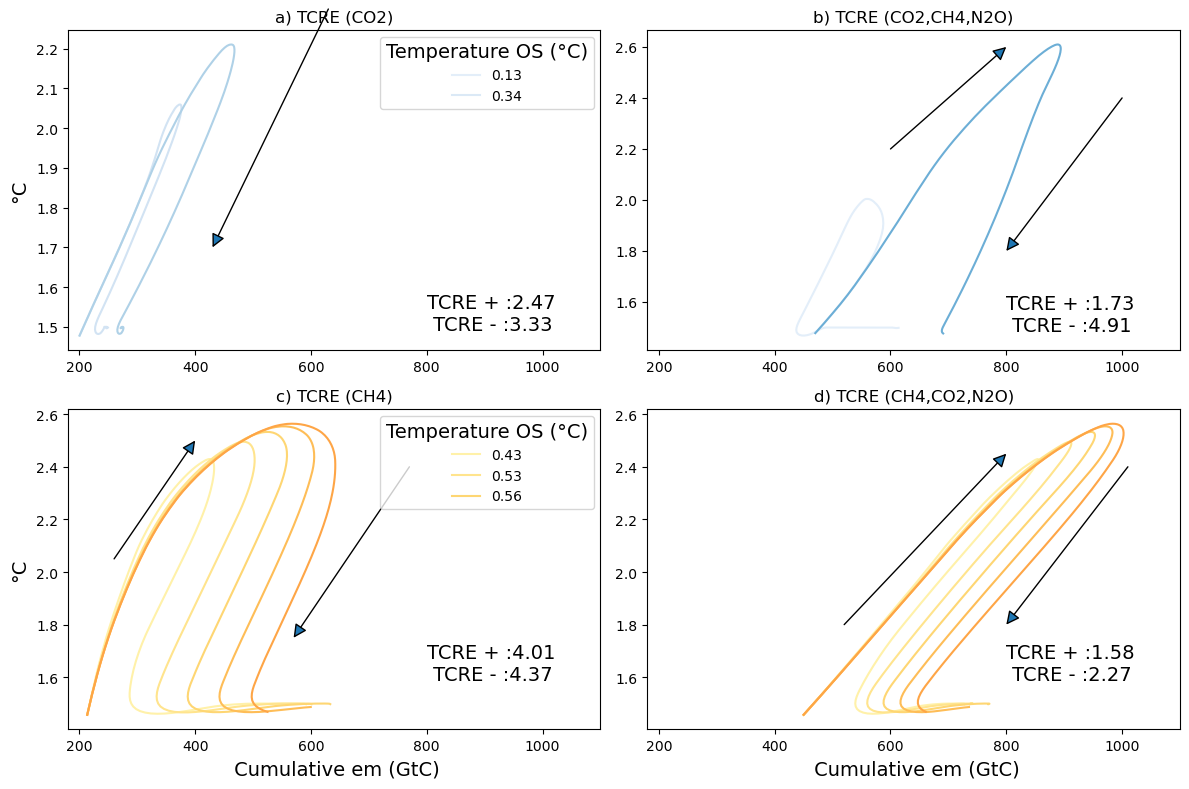

In [52]:
## -------------------- PLOT ---------------------##
title = 'ACC2 1.5 degC target CO2 & CH4 - TCRE, IPSL emulation'

# Plot configuration
width_inch = 12
height_inch = 8

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# Plot Ratio N/P
# xlabel = 'Overshoot Amount'
# ylabel = 'Ratio'
# xlabelpad = 5
# ylabelpad = 5
# ax = fig.add_subplot(gs[0, 0])
# ax.plot(OS_ch4_15[7:],ratio_ch4_15[7:], marker='o')
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
# ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
# ax.set_title("Ratio N/P emissions")

# Plot TCRE CH4
xlabel = 'Cumulative em (GtC)'
ylabel = 'Temperature (°C)'
xlabelpad = 5
ylabelpad = 5

prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)

xlabelpad = 5
ylabelpad = 5


# Plot TCRE CO2
xlabel = ' Cumulative em (GtC)'
ylabel = '°C'
xlabelpad = 5
ylabelpad = 5
ax = fig.add_subplot(gs[0, 0])
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)

for scn in targets[5:]:
    c = next(color)
    data = df_tcre_co2_15[(df_tcre_co2_15.TARGET >= 106) & (df_co2_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"][20:200]
    em = data["CUMCO2"][20:200]
    temp = data['T2M'][20:200]
    ax.plot(em, temp,label=overshoot, color=c)
ax.annotate("", xytext=(300, 2), xy=(500,2.5),  xycoords = 'data', arrowprops=prop)
ax.annotate("", xytext=(630, 2.3), xy=(430,1.7), xycoords = 'data', arrowprops=prop)
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
ax.text(800, 1.5,'TCRE + :2.47\n TCRE - :3.33', wrap = True, size = 14)
ax.set_title("a) TCRE (CO2)")
legend = df_OS_co2_15[(df_OS_co2_15.TARGET >= 106) & (df_OS_co2_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend, loc='upper right',title = "Temperature OS (°C)", title_fontsize = 14, fontsize=10)

# Plot TCRE CO2+CH4+N2O
xlabelpad = 5
ylabelpad = 5
ax = fig.add_subplot(gs[0, 1])

color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(targets[5:]))))
for scn in targets[5:]:
    c = next(color)
    data = df_tcre_co2_15[(df_tcre_co2_15.TARGET >= 106) & (df_co2_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"][20:200]
    em = data["CUMGHG"][20:200]
    temp = data['T2M'][20:200]
    ax.plot(em, temp,label=overshoot, color=c)
ax.annotate("", xytext=(600, 2.2), xy=(800,2.6), xycoords = 'data', arrowprops=prop)
ax.annotate("", xytext=(1000, 2.4), xy=(800,1.8), xycoords = 'data', arrowprops=prop)
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.text(800, 1.5,'TCRE + :1.73\n TCRE - :4.91', wrap = True, size = 14)
ax.set_title("b) TCRE (CO2,CH4,N2O)")

# Plot TCRE CH4
ax = fig.add_subplot(gs[1, 0])

color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[10:]:
    c = next(color)
    data = df_tcre_ch4_15[(df_tcre_ch4_15.TARGET >= 156) & (df_tcre_ch4_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"][20:200]
    em = data["CUMCH4"][20:200]
    temp = data['T2M'][20:200]
    ax.plot(em, temp,label=overshoot, color=c)
ax.annotate("", xytext=(260, 2.05), xy=(400, 2.5), xycoords = 'data', arrowprops=prop)
ax.annotate("", xytext=(770, 2.4), xy=(570, 1.75), xycoords = 'data', arrowprops=prop)
ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.text(800, 1.6,'TCRE + :4.01\n TCRE - :4.37', wrap = True,  size = 14)
ax.set_title("c) TCRE (CH4)")
legend2 = df_OS_ch4_15[(df_OS_ch4_15.TARGET >= 146) & (df_OS_ch4_15.DR == 4)].T2M_OS.astype(float).round(2)
ax.legend(legend2, loc='upper right',title = "Temperature OS (°C)", title_fontsize = 14, fontsize=10)

# Plot TCRE CH4+CO2+N2O
ax = fig.add_subplot(gs[1, 1])

color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(targets[9:]))))
for scn in targets[10:]:
    c = next(color)
    data = df_tcre_ch4_15[(df_tcre_ch4_15.TARGET >= 156) & (df_tcre_ch4_15.DR == 4)]
    data = data[data["TARGET"] == scn]
    year = data["YEAR"][20:200]
    em = data["CUMGHG"][20:200]
    temp = data['T2M'][20:200]
    ax.plot(em, temp,label=overshoot, color=c)
ax.annotate("", xytext=(520, 1.8), xy=(800,2.45), xycoords = 'data', arrowprops=prop)
ax.annotate("", xytext=(1010, 2.4), xy=(800,1.8), xycoords = 'data', arrowprops=prop)
ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.text(800, 1.6,'TCRE + :1.58\n TCRE - :2.27', wrap = True, size = 14)
ax.set_title("d) TCRE (CH4,CO2,N2O)")


# output file
# fig.suptitle(title, fontsize = 14)
output_file = os.path.join(out_path,title.replace(' ','_')) + "OS_em_4plots.png"

# save the output file
# plt.savefig(output_file)

### DR = (2,4,6)

In [205]:
ticks_co2_15 = ["2120-2%", "2120-4%", "2120-6%", "2150-2%", "2150-4%", "2150-6%", "2180-2%", "2180-4%", "2180-6%"]

ticks_ch4 = ["2150-2%",  "2150-4%",  "2150-6%", "2170-2%", "2170-4%", "2170-6%", "2190-2%", "2190-4%", "2190-6%"]

In [187]:
print(df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & ((df_OS_co2_15.DR == 2) | (df_OS_co2_15.DR == 4) | (df_OS_co2_15.DR == 6))]['TCREplus+'].mean())
print(df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & ((df_OS_co2_15.DR == 2) | (df_OS_co2_15.DR == 4) | (df_OS_co2_15.DR == 6))]['TCREplus-'].mean())

print(df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))]['TCREplus+'].mean())
print(df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))]['TCREplus-'].mean())

3.1523973522767714
5.287215567336572
2.668677194168371
2.896496180031073


In [199]:
print(df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & (df_OS_co2_15.DR == 2)]['TCREplus+'].mean())
print(df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & (df_OS_co2_15.DR == 4)]['TCREplus-'].mean())
print(df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & (df_OS_co2_15.DR == 6)]['TCREplus-'].mean())

3.1124631004603303
5.2516518764367754
5.097857278677021


In [198]:
print(df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & (df_OS_ch4_15.DR == 2)]['TCREplus-'].mean())
print(df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & (df_OS_ch4_15.DR == 4)]['TCREplus-'].mean())
print(df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & (df_OS_ch4_15.DR == 6)]['TCREplus-'].mean())

3.144882831510902
2.8590791070007593
2.6855266015815573


In [214]:
print(df_OS_ch4_15[(df_OS_ch4_15.TARGET == 156) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))]['TCREplus-'].mean())
print(df_OS_ch4_15[(df_OS_ch4_15.TARGET == 176) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))]['TCREplus-'].mean())
print(df_OS_ch4_15[(df_OS_ch4_15.TARGET == 196) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))]['TCREplus-'].mean())

2.9579093819069207
2.812898595512571
2.9186805626737278


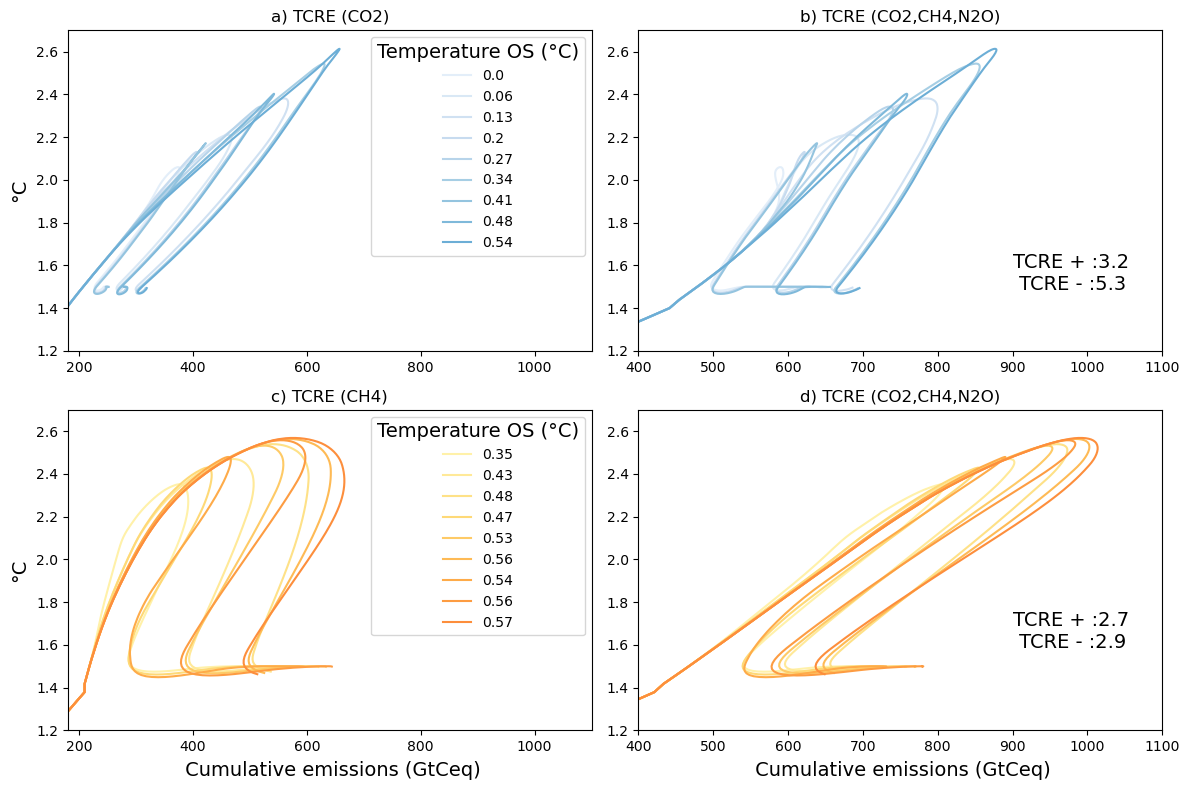

In [212]:
## -------------------- PLOT ---------------------##
title = 'ACC2 1.5 degC target CO2 & CH4 - TCRE, IPSL emulation'

# Plot configuration
width_inch = 12
height_inch = 8

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(2, 2)

# Plot Ratio N/P
# xlabel = 'Overshoot Amount'
# ylabel = 'Ratio'
# xlabelpad = 5
# ylabelpad = 5
# ax = fig.add_subplot(gs[0, 0])
# ax.plot(OS_ch4_15[7:],ratio_ch4_15[7:], marker='o')
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
# ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
# ax.set_title("Ratio N/P emissions")

# Plot TCRE CO2
xlabel = ' Cumulative emissions (GtCeq)'
ylabel = '°C'
xlabelpad = 5
ylabelpad = 5
ax = fig.add_subplot(gs[0, 0])
ax.set_title("a) TCRE (CO2)")
prop = dict(arrowstyle="-|>,head_width=0.4,head_length=0.8",
            shrinkA=0,shrinkB=0)

color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(ticks_co2_15))))
for dr in list(drates):
    for scn in [126, 156, 186]:
        c = next(color)
        data = df_co2_15
        data = data[data["DR"] == dr]
        data = data[data["TARGET"] == scn]
        temp = data["T2M"]
        cumco2 = data["ANTCO2"].cumsum()
        em = cumco2
        ax.plot(em[0:200],temp[0:200], label=overshoot, color=c)
# ax.annotate("", xytext=(300, 2), xy=(500,2.5),  xycoords = 'data', arrowprops=prop)
# ax.annotate("", xytext=(630, 2.3), xy=(430,1.7), xycoords = 'data', arrowprops=prop)
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.set_ylim(1.2,2.7)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
legend2 = df_OS_co2_15[((df_OS_co2_15.TARGET == 126) | (df_OS_co2_15.TARGET == 156) | (df_OS_co2_15.TARGET == 186)) & ((df_OS_co2_15.DR == 2) | (df_OS_co2_15.DR == 4) | (df_OS_co2_15.DR == 6))].T2M_OS.astype(float).round(2)

ax.legend(legend, loc='upper right',title = "Temperature OS (°C)", title_fontsize = 14, fontsize=10)

# Plot TCRE CO2+CH4+N2O
xlabelpad = 5
ylabelpad = 5
ax = fig.add_subplot(gs[0, 1])
ax.set_title("b) TCRE (CO2,CH4,N2O)")
color = iter(cm.Blues_r(np.linspace(0.9, 0.5, len(ticks_co2_15))))
for dr in list(drates):
    for scn in [126, 156, 186]:
        c = next(color)
        data = df_co2_15
        data = data[data["DR"] == dr]
        data = data[data["TARGET"] == scn]
        temp = data["T2M"]
        cumco2 = data["ANTCO2"].cumsum()
        cumch4 = np.cumsum(gwpstar(data["ANTCH4"].to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        cumn2o = np.cumsum(data['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        em = cumco2+cumch4+cumn2o
        ax.plot(em[0:200],temp[0:200], label=overshoot, color=c)
# ax.annotate("", xytext=(600, 2.2), xy=(800,2.6), xycoords = 'data', arrowprops=prop)
# ax.annotate("", xytext=(1000, 2.4), xy=(800,1.8), xycoords = 'data', arrowprops=prop)
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(400,1100)
ax.set_ylim(1.2,2.7)
ax.text(900, 1.5,'TCRE + :3.2\n TCRE - :5.3', wrap = True, size = 14)

# Plot TCRE CH4
ax = fig.add_subplot(gs[1, 0])
ax.set_title("c) TCRE (CH4)")
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(ticks_ch4))))
for dr in list(drates):
    for scn in [156, 176, 196]:
        c = next(color)
        data = df_ch4_15
        data = data[data["DR"] == dr]
        data = data[data["TARGET"] == scn]
        temp = data["T2M"]
        cumch4 = np.cumsum(gwpstar(data["ANTCH4"].to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        em = cumch4
        ax.plot(em[0:200],temp[0:200], label=overshoot, color=c)
# ax.annotate("", xytext=(260, 2.05), xy=(400, 2.5), xycoords = 'data', arrowprops=prop)
# ax.annotate("", xytext=(770, 2.4), xy=(570, 1.75), xycoords = 'data', arrowprops=prop)
ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
ax.set_xlim(180,1100)
ax.set_ylim(1.2,2.7)
legend2 = df_OS_ch4_15[((df_OS_ch4_15.TARGET == 156) | (df_OS_ch4_15.TARGET == 176) | (df_OS_ch4_15.TARGET == 196)) & ((df_OS_ch4_15.DR == 2) | (df_OS_ch4_15.DR == 4) | (df_OS_ch4_15.DR == 6))].T2M_OS.astype(float).round(2)
ax.legend(legend2, loc='upper right',title = "Temperature OS (°C)", title_fontsize = 14, fontsize=10)

# Plot TCRE CH4+CO2+N2O
ax = fig.add_subplot(gs[1, 1])
ax.set_title("d) TCRE (CO2,CH4,N2O)")
color = iter(cm.YlOrRd_r(np.linspace(0.9, 0.5, len(ticks_ch4))))
for dr in list(drates):
    for scn in [156, 176, 196]:
        c = next(color)
        data = df_ch4_15
        data = data[data["DR"] == dr]
        data = data[data["TARGET"] == scn]
        temp = data["T2M"]
        cumco2 = data["ANTCO2"].cumsum()
        cumch4 = np.cumsum(gwpstar(data["ANTCH4"].to_numpy()*MttoGt ,4.53,4.25,28)*CO2toC)
        cumn2o = np.cumsum(data['ANTN2O']*265*NtoN2O*MttoGt*CO2toC)
        em = cumco2+cumch4+cumn2o
        ax.plot(em[0:200],temp[0:200], label=overshoot, color=c)
# ax.annotate("", xytext=(520, 1.8), xy=(800,2.45), xycoords = 'data', arrowprops=prop)
# ax.annotate("", xytext=(1010, 2.4), xy=(800,1.8), xycoords = 'data', arrowprops=prop)
ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_xlim(400,1100)
ax.set_ylim(1.2,2.7)
ax.text(900, 1.6,'TCRE + :2.7\n TCRE - :2.9', wrap = True, size = 14)


# output file
# fig.suptitle(title, fontsize = 14)
output_file = os.path.join(out_path,title.replace(' ','_')) + "OS_em_4plots.png"

# save the output file
# plt.savefig(output_file)

# GWP conversion in ACC2

In [ ]:
simulations_ch4 = [2090, 2100, 2110, 2120, 2130, 2140, 2150, 2160, 2170, 2180, 2190, 2200, 2210, 2220, 2230, 2240]

## -- TEMPERATURE
folder = "/CarbonBudget_BETA&Q10_COU_new_IPSL_gwp/CH4_15/"
file = "T2M_" + model + ".csv"
df_acc2_tas_ch4_15=pd.read_csv(os.path.join(data_path+folder+file), header=0)
df_acc2_tas_ch4_15.columns = [2240, 2230, 2220, 2210, 2200, 2190, 2180, 2170, 2160, 2150, 2140, 2130, 2120, 2110, 2100, 2090]; 
tas_ch4_15_acc2_gwp = df_acc2_tas_ch4_15.reindex(columns=simulations)
tas_ch4_15_acc2_gwp = tas_ch4_15_acc2_gwp.drop(columns=[2090, 2100, 2110, 2120, 2130])

In [ ]:
# tas_ch4_15_acc2_gwp = tas_ch4_15_acc2_gwp.subtract(tas_ch4_15_acc2_gwp[2140], axis = 'rows')
# tas_ch4_15_acc2 = tas_ch4_15_acc2.subtract(tas_ch4_15_acc2[2140], axis = 'rows')

In [ ]:
## Defining TCRE as in Zickfeld (2016), positive and negative cumulative emissions
min_ch4_15_neg = gwpch4cum_15_acc2[380:450].idxmin()
max_ch4_15_pos = gwpch4cum_15_acc2[300:450].idxmax()

tcre_pos = []
for x, item in enumerate(tas_ch4_15_acc2.columns):
    content =tas_ch4_15_acc2.iloc[max_ch4_15_pos,x]/gwpch4cum_15_acc2.iloc[max_ch4_15_pos,x]
    tcre_pos.append(content*1000)
print(np.round(np.mean(tcre_pos), 2))

tcre_neg = []
for x, item in enumerate(tas_ch4_15_acc2.columns):
    content = (tas_ch4_15_acc2.iloc[min_ch4_15_neg[x+5],x] - tas_ch4_15_acc2.iloc[max_ch4_15_pos,x].iloc[x])/(gwpch4cum_15_acc2.iloc[min_ch4_15_neg[x+5],x] - gwpch4cum_15_acc2.iloc[max_ch4_15_pos,x].iloc[x])
    tcre_neg.append(content*1000)
print(np.round(np.mean(tcre_neg), 2))

tcre_gwp_pos = []
for x, item in enumerate(tas_ch4_15_acc2.columns):
    content = tas_ch4_15_acc2_gwp.iloc[max_ch4_15_pos,x]/gwpch4cum_15_acc2.iloc[max_ch4_15_pos,x]
    tcre_gwp_pos.append(content*1000)
print(np.round(np.mean(tcre_gwp_pos), 2))

tcre_gwp_neg = []
for x, item in enumerate(tas_ch4_15_acc2.columns):
    content = (tas_ch4_15_acc2_gwp.iloc[min_ch4_15_neg[x+5],x] - tas_ch4_15_acc2_gwp.iloc[max_ch4_15_pos,x].iloc[x])/(gwpch4cum_15_acc2.iloc[min_ch4_15_neg[x+5],x] - gwpch4cum_15_acc2.iloc[max_ch4_15_pos,x].iloc[x])*1000
    tcre_gwp_neg.append(content)
print(np.round(np.mean(tcre_gwp_neg), 2))

2.67
0.79
3.05
1.06


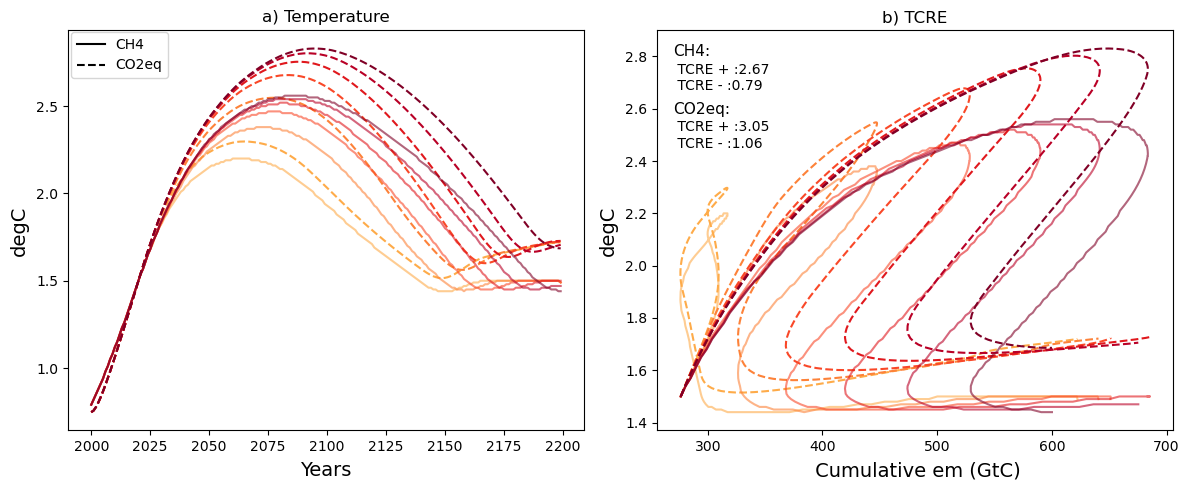

In [ ]:

import matplotlib.gridspec as gridspec
%matplotlib inline

## -------------------- PLOT ---------------------##
title = 'ACC2 1.5 degC target CH4 - TCRE, {} emulation'.format(model)

# Plot configuration
width_inch = 12
height_inch = 5

fig = plt.figure(figsize=(width_inch, height_inch), tight_layout=True)
gs = gridspec.GridSpec(1, 2)

# Plot Ratio N/P
# xlabel = 'Overshoot Amount'
# ylabel = 'Ratio'
# xlabelpad = 5
# ylabelpad = 5
# ax = fig.add_subplot(gs[0, 0])
# ax.plot(OS_ch4_15[7:],ratio_ch4_15[7:], marker='o')
# ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
# ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
# ax.set_title("Ratio N/P emissions")

# Plot TCRE CH4
xlabel = 'Years'
ylabel = 'degC'
xlabelpad = 5
ylabelpad = 5

xlabelpad = 5
ylabelpad = 5

simulations_ch4_feasible = tas_ch4_20_acc2.columns

ax = fig.add_subplot(gs[0, 0])

color = iter(cm.YlOrRd_r(np.linspace(0.6, 0, len(tas_ch4_15_acc2.T))))
for x, item in enumerate(tas_ch4_15_acc2_gwp.columns):
    c = next(color)
    ax.plot(np.arange(2000,2200,1),tas_ch4_15_acc2.iloc[250:450,x],label=simulations_ch4_feasible, color=c, alpha = 0.6)
    ax.plot(np.arange(2000,2200,1),tas_ch4_15_acc2_gwp.iloc[250:450,x],label=simulations_ch4_feasible, color=c, linestyle='dashed')
#ax.annotate("", xytext=(320, 2.05), xy=(440, 2.5), xycoords = 'data', arrowprops=prop)
#ax.annotate("", xytext=(690, 2.25), xy=(600, 1.75), xycoords = 'data', arrowprops=prop)
#ax.legend(overshoot, loc='upper left',title = "OS GtC", title_fontsize = 14, bbox_to_anchor=(0.01, 1), fontsize=10)
ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
# ax.text(570, 1.8,'TCRE + :4.01\n TCRE - :1.39', wrap = True,  size = 14)
ax.set_title("a) Temperature")

linestyles = ['-', "--"]
dummy_lines = []
for b_idx, b in enumerate(np.arange(2)):
    dummy_lines.append(ax.plot([],[], c="black", ls = linestyles[b_idx])[0])
fig.legend([dummy_lines[i] for i in [0,1]],["CH4","CO2eq"], loc='upper right',bbox_to_anchor=(0.15, 0.94),fontsize=10)


# tas_ch4_15_acc2_gwp = tas_ch4_15_acc2_gwp.subtract(tas_ch4_15_acc2_gwp[2140], axis = 'rows')
# tas_ch4_15_acc2 = tas_ch4_15_acc2.subtract(tas_ch4_15_acc2[2140], axis = 'rows')

ax = fig.add_subplot(gs[0, 1])

xlabel = ' Cumulative em (GtC)'

color = iter(cm.YlOrRd_r(np.linspace(0.6, 0, len(tas_ch4_15_acc2.T))))
for x, item in enumerate(tas_ch4_15_acc2_gwp.columns):
    c = next(color)
    ax.plot(gwpch4cum_15_acc2.iloc[270:450,x], tas_ch4_15_acc2.iloc[270:450,x],label=overshoot, color=c, alpha = 0.6)
    ax.plot(gwpch4cum_15_acc2.iloc[270:450,x], tas_ch4_15_acc2_gwp.iloc[270:450,x],label=overshoot, color=c, linestyle='dashed')
    #ax.annotate("", xytext=(320, 2.05), xy=(440, 2.5), xycoords = 'data', arrowprops=prop)
#ax.annotate("", xytext=(690, 2.25), xy=(600, 1.75), xycoords = 'data', arrowprops=prop)
#ax.legend(overshoot, loc='upper left',title = "OS GtC", title_fontsize = 14, bbox_to_anchor=(0.01, 1), fontsize=10)
ax.text(270, 2.8,'CH4:', wrap = True, size = 11)
ax.text(270, 2.68,' TCRE + :2.67\n TCRE - :0.79', wrap = True, size = 10)

ax.text(270, 2.58,'CO2eq:', wrap = True, size = 11)
ax.text(270, 2.46,' TCRE + :3.05\n TCRE - :1.06', wrap = True, size = 10)

ax.set_xlabel(xlabel, labelpad=xlabelpad, fontsize=14)
ax.set_ylabel(ylabel, labelpad=ylabelpad, fontsize=14)
ax.set_title("b) TCRE")

# output file
# fig.suptitle(title, fontsize = 14)
output_file = os.path.join(out_path,title.replace(' ','_')) + "_GWP.png"

# save the output file
plt.savefig(output_file)